# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1212]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [1213]:
data = pd.read_csv('data/coupons.csv')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


# Investigate the dataset for missing or problematic data.

In [1214]:
# Calculate the % of data that is missing for each column
data_percent_present = (data.isnull().sum() / data.shape[0] * 100)
data_percent_present

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [1215]:
# Review the columns missing data
for column in ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(column + ' Percentage of Values')
    print(data[column].value_counts(dropna=False, normalize=True))
    print('\n')


car Percentage of Values
NaN                                         0.991485
Scooter and motorcycle                      0.001734
Mazda5                                      0.001734
do not drive                                0.001734
crossover                                   0.001656
Car that is too old to install Onstar :D    0.001656
Name: car, dtype: float64


Bar Percentage of Values
never    0.409729
less1    0.274519
1~3      0.194970
4~8      0.084831
gt8      0.027515
NaN      0.008436
Name: Bar, dtype: float64


CoffeeHouse Percentage of Values
less1    0.266872
1~3      0.254257
never    0.233523
4~8      0.140650
gt8      0.087591
NaN      0.017108
Name: CoffeeHouse, dtype: float64


CarryAway Percentage of Values
1~3      0.368338
4~8      0.335699
less1    0.146326
gt8      0.125670
never    0.012062
NaN      0.011905
Name: CarryAway, dtype: float64


RestaurantLessThan20 Percentage of Values
1~3      0.423841
4~8      0.282245
less1    0.165011
gt8      0.101309
neve

 99.14% of the data is missing a value for 'car'. Since most of this data is missing, I will drop the 'car' column.

In [1216]:
data_cleaned = data.drop(columns=['car'])

In [1217]:
unique_rows_with_na = data_cleaned[data_cleaned.isna().any(axis=1)].shape[0]
print(unique_rows_with_na, unique_rows_with_na / data_cleaned.shape[0] * 100)

605 4.769788710186061


Of the remaining 605 rows (4.77%) that contain missing data, they all belong to columns that share the same values. I will replace these values with 'n/a' indicating the value is not available for these rows.

In [1218]:
data_cleaned.fillna('n/a', inplace=True)

In [1219]:
data_cleaned.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [1220]:
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    print(column + ' Percentage of Values')
    print(data_cleaned[column].value_counts(dropna=False, normalize=True))
    print('\n')

Bar Percentage of Values
never    0.409729
less1    0.274519
1~3      0.194970
4~8      0.084831
gt8      0.027515
n/a      0.008436
Name: Bar, dtype: float64


CoffeeHouse Percentage of Values
less1    0.266872
1~3      0.254257
never    0.233523
4~8      0.140650
gt8      0.087591
n/a      0.017108
Name: CoffeeHouse, dtype: float64


CarryAway Percentage of Values
1~3      0.368338
4~8      0.335699
less1    0.146326
gt8      0.125670
never    0.012062
n/a      0.011905
Name: CarryAway, dtype: float64


RestaurantLessThan20 Percentage of Values
1~3      0.423841
4~8      0.282245
less1    0.165011
gt8      0.101309
never    0.017345
n/a      0.010249
Name: RestaurantLessThan20, dtype: float64


Restaurant20To50 Percentage of Values
less1    0.479108
1~3      0.259382
never    0.168401
4~8      0.057395
gt8      0.020814
n/a      0.014901
Name: Restaurant20To50, dtype: float64




In [1221]:
data_cleaned.duplicated().sum()

74

There looks to be 74 duplicated rows. This is ok considering our dataset. It is possible for observers to have the same conditions, therefore this is to be expected and tollerated. No action needed

# Rename Columns and Values
I will change the column name 'Y' to 'Accepted' and the values 1 to True and 0 to False for easier readability

In [1222]:
data_cleaned.rename(columns={'Y': "Accepted"}, inplace=True)
data_cleaned['Accepted'].replace([1,0], [True, False], inplace=True)
data_cleaned['has_children'].replace([1,0], [True, False], inplace=True)
data_cleaned[['Accepted', 'has_children']].sample(5)

,Accepted,has_children
5864,False,False
765,True,False
10806,False,False
2836,True,True
7712,True,False


# Validate Output

In [1223]:
print(data_cleaned.shape)

for column in data_cleaned.columns:
    print(column + ' Percentage of Values')
    print(data_cleaned[column].value_counts(dropna=False, normalize=True))
    print('\n')

data_cleaned.sample(5)
# data_cleaned.info()

(12684, 25)
destination Percentage of Values
No Urgent Place    0.495348
Home               0.255203
Work               0.249448
Name: destination, dtype: float64


passanger Percentage of Values
Alone        0.575922
Friend(s)    0.260013
Partner      0.084752
Kid(s)       0.079313
Name: passanger, dtype: float64


weather Percentage of Values
Sunny    0.793835
Snowy    0.110769
Rainy    0.095396
Name: weather, dtype: float64


temperature Percentage of Values
80    0.514664
55    0.302744
30    0.182592
Name: temperature, dtype: float64


time Percentage of Values
6PM     0.254652
7AM     0.249448
10AM    0.179360
2PM     0.158389
10PM    0.158152
Name: time, dtype: float64


coupon Percentage of Values
Coffee House             0.315043
Restaurant(<20)          0.219647
Carry out & Take away    0.188663
Bar                      0.159019
Restaurant(20-50)        0.117629
Name: coupon, dtype: float64


expiration Percentage of Values
1d    0.559051
2h    0.440949
Name: expiration, dtyp

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
5313,No Urgent Place,Partner,Sunny,80,6PM,Bar,2h,Male,21,Unmarried partner,...,less1,4~8,1~3,1~3,1,1,0,0,1,False
3303,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,4~8,4~8,1~3,less1,1,1,0,0,1,True
6392,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,31,Single,...,never,1~3,1~3,1~3,1,0,0,1,0,False
466,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,1,0,0,1,True
2321,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Female,31,Single,...,1~3,1~3,4~8,1~3,1,1,0,0,1,True


From the data below, 56.84% of observations accepted the coupon.

In [1224]:
data_cleaned['Accepted'].value_counts(normalize=True)

True     0.568433
False    0.431567
Name: Accepted, dtype: float64

Text(0.5, 0, 'Count')

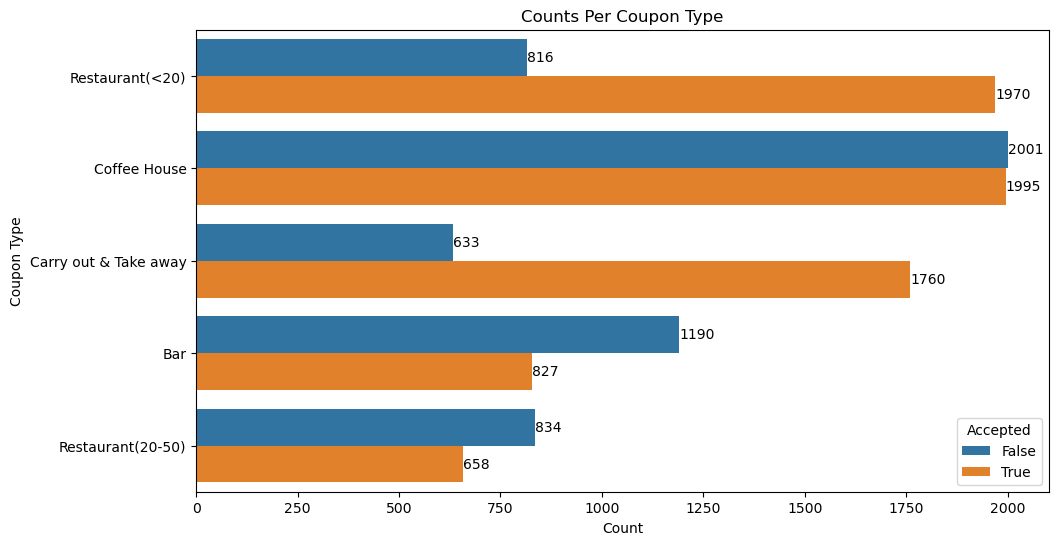

In [1225]:
plt.figure(figsize=(11,6))
fig = sns.countplot(data_cleaned, y='coupon', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Coupon Type')
plt.ylabel('Coupon Type')
plt.xlabel('Count')

# Initial Data Exploration

Text(0.5, 0, 'Count')

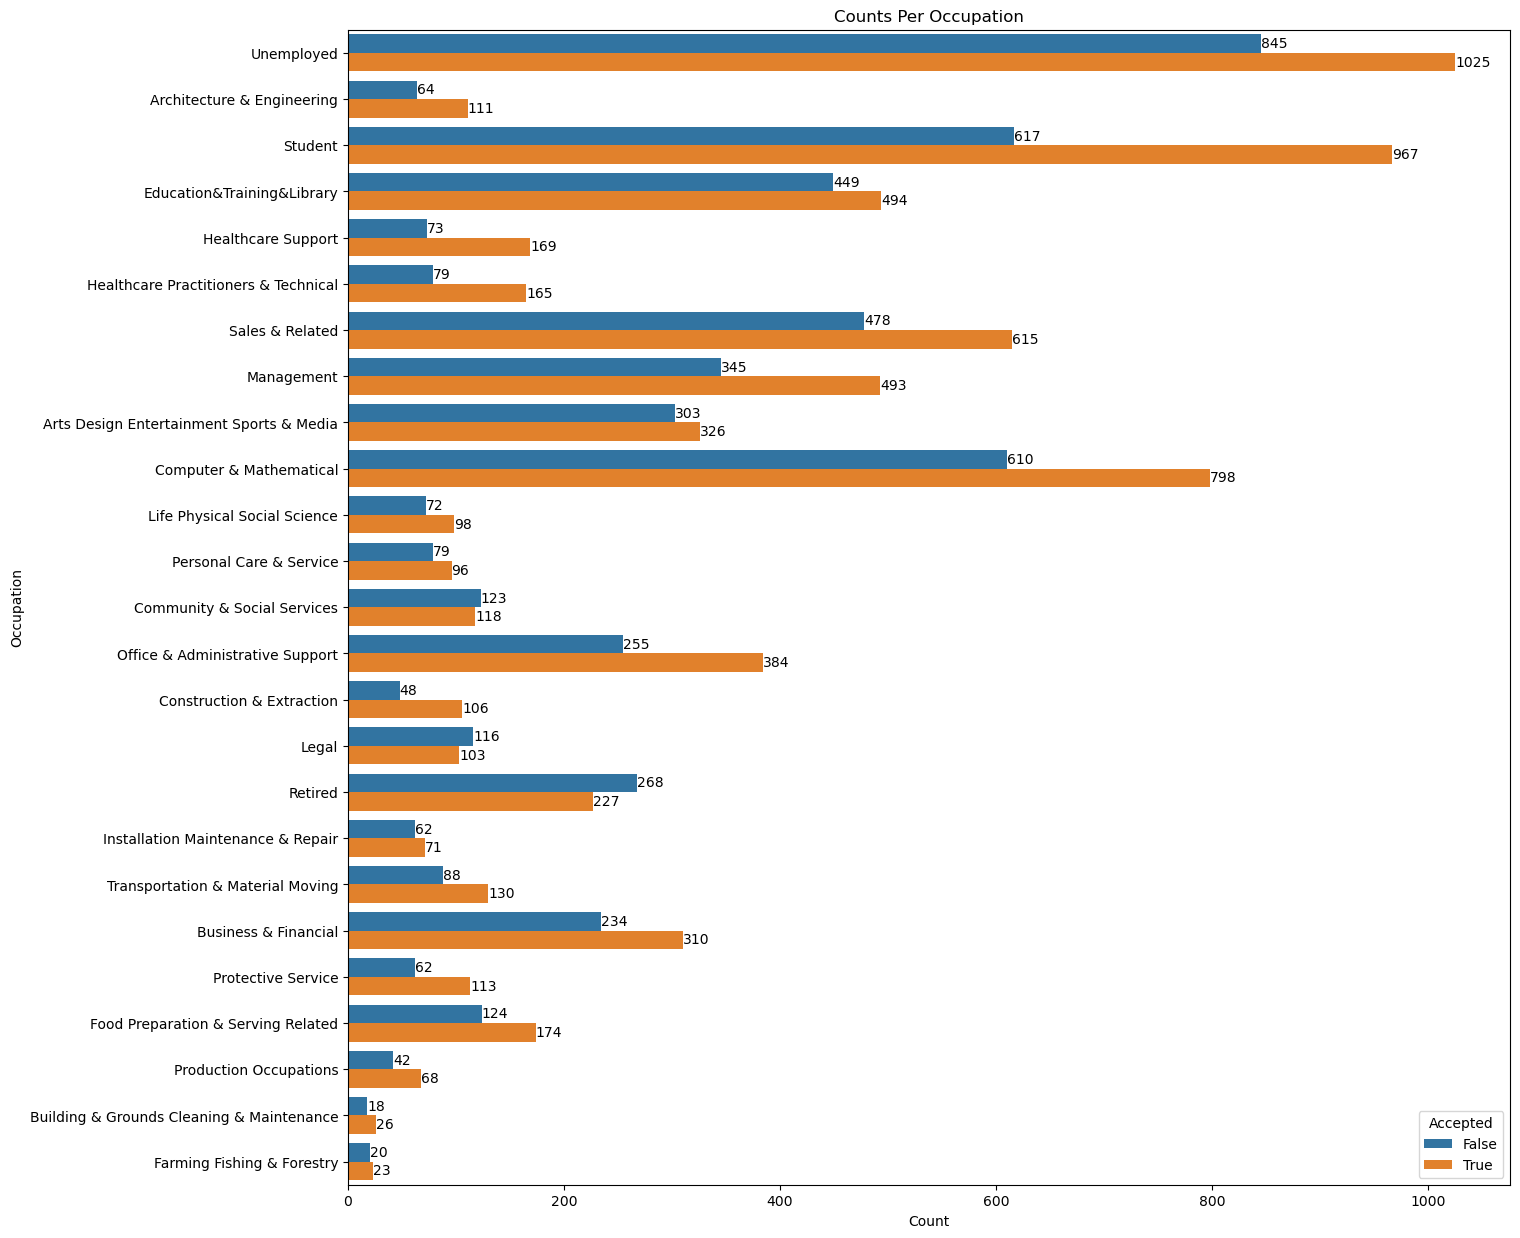

In [1226]:
plt.figure(figsize=(15,15))
fig = sns.countplot(data_cleaned, y='occupation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Occupation')
plt.ylabel('Occupation')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

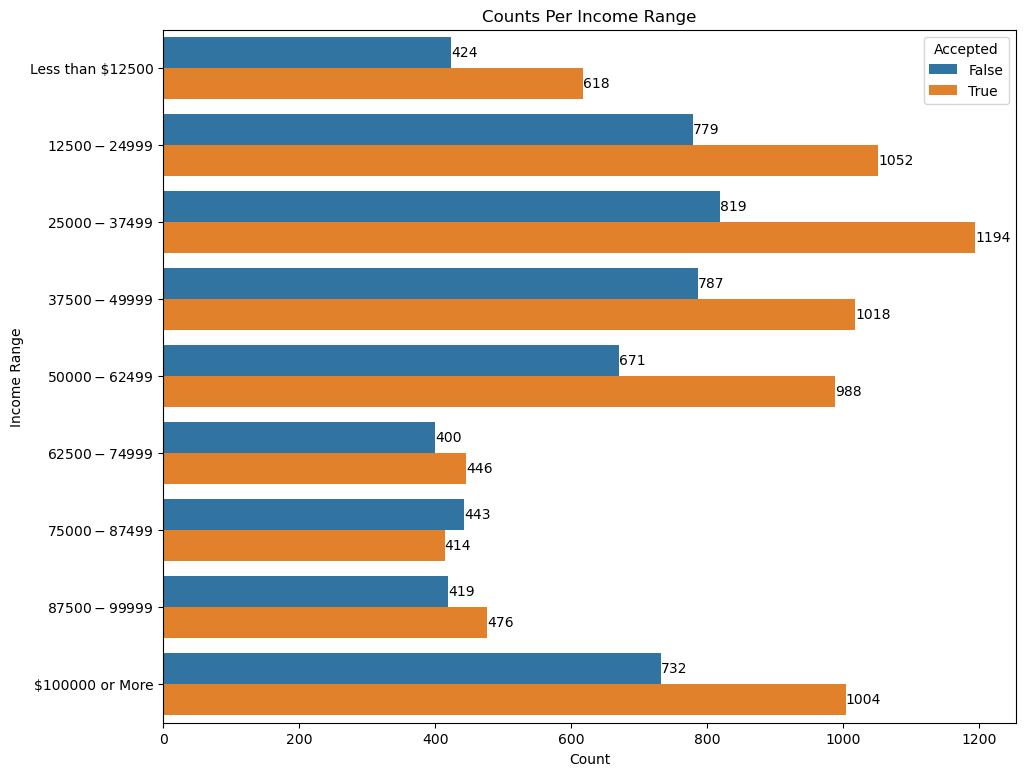

In [1227]:
plt.figure(figsize=(11,9))
fig = sns.countplot(data_cleaned, y='income', hue='Accepted', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Income Range')
plt.ylabel('Income Range')
plt.xlabel('Count')

Text(0.5, 0, 'Age Group')

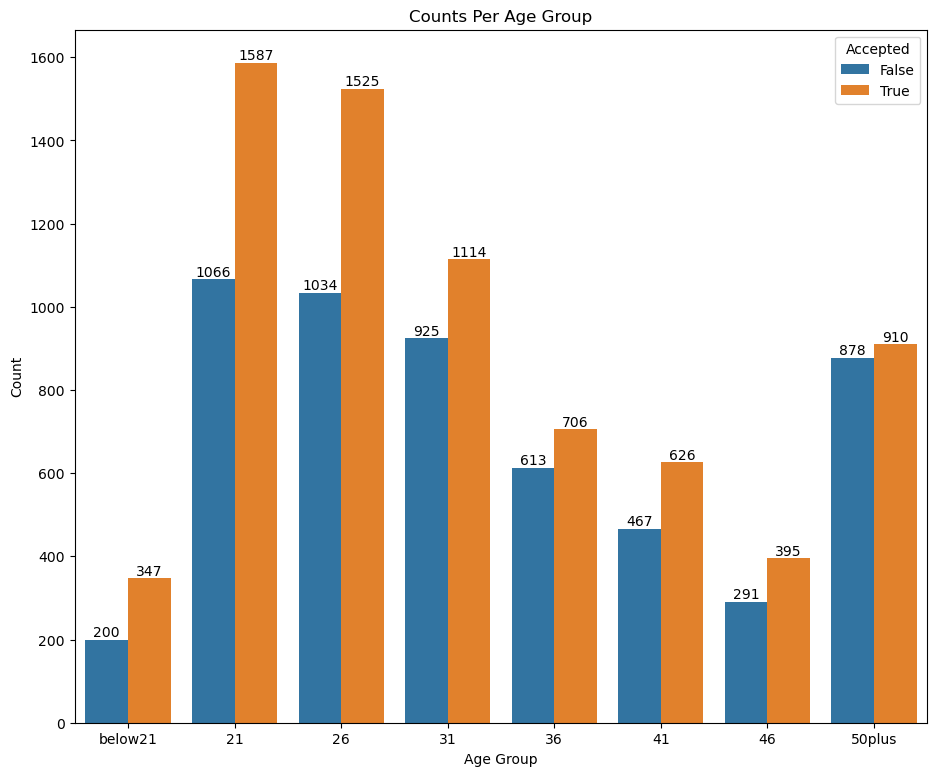

In [1228]:
plt.figure(figsize=(11,9))
fig = sns.countplot(data_cleaned, x='age', hue='Accepted', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')

Text(0.5, 0, 'Weather Condition')

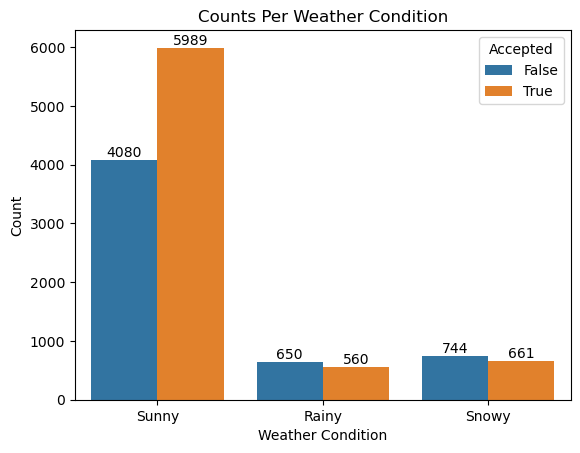

In [1229]:
fig = sns.countplot(data_cleaned, x='weather', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Weather Condition')
plt.ylabel('Count')
plt.xlabel('Weather Condition')

Text(0, 0.5, 'Marital Status Group')

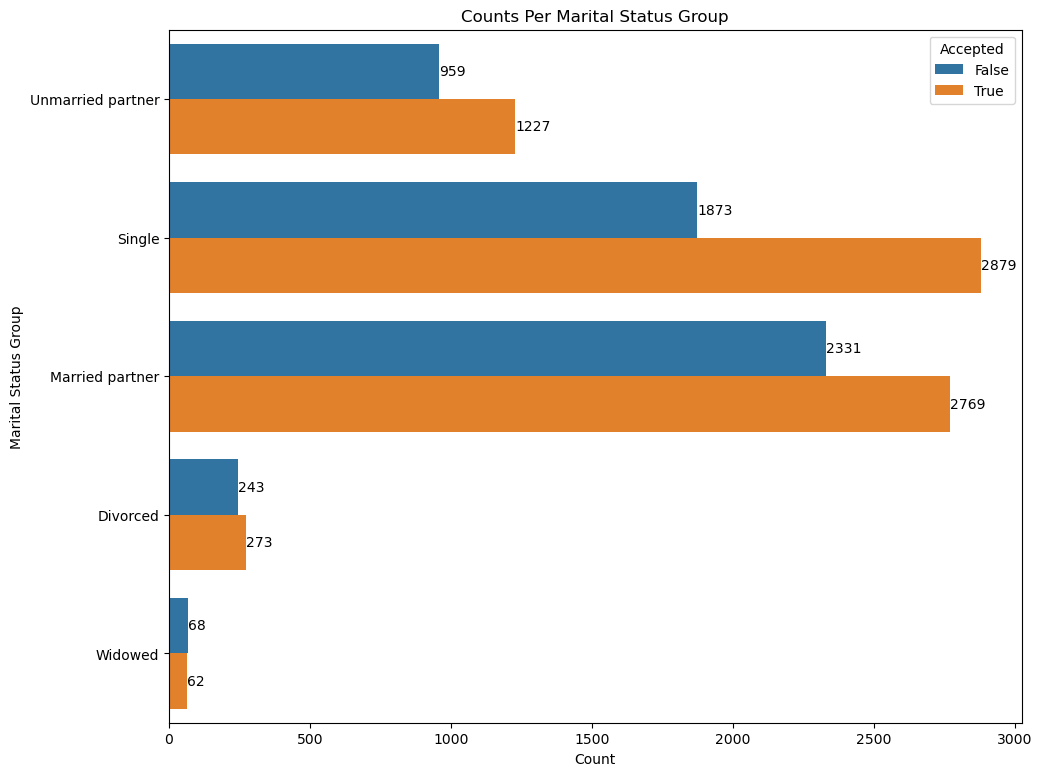

In [1230]:
plt.figure(figsize=(11,9))
fig = sns.countplot(data_cleaned, y='maritalStatus', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Marital Status Group')
plt.xlabel('Count')
plt.ylabel('Marital Status Group')

Text(0.5, 0, 'Destination Group')

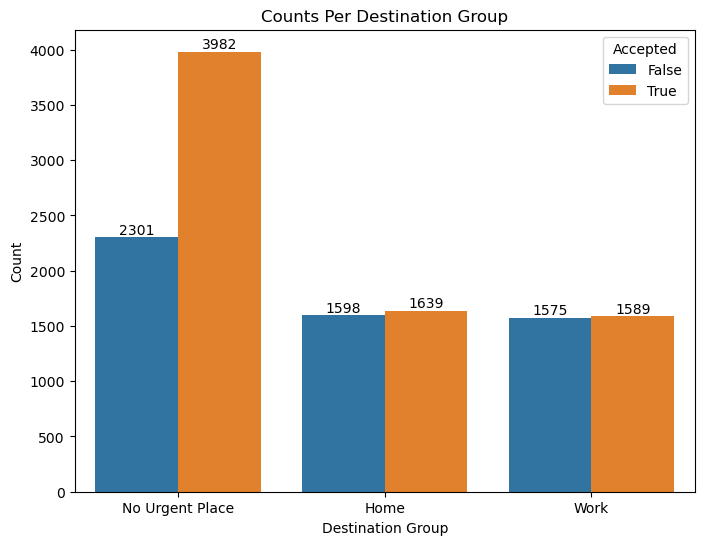

In [1231]:
plt.figure(figsize=(8,6))
fig = sns.countplot(data_cleaned, x='destination', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Destination Group')
plt.ylabel('Count')
plt.xlabel('Destination Group')

Text(0.5, 0, 'Time Group')

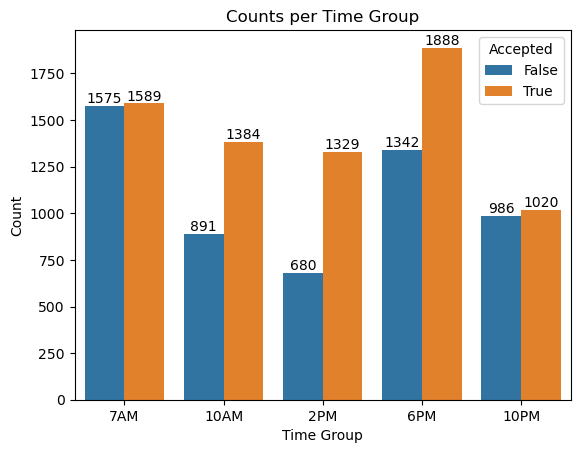

In [1232]:
fig = sns.countplot(data_cleaned, x='time', hue='Accepted', order=['7AM', '10AM', '2PM', '6PM', '10PM'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts per Time Group')
plt.ylabel('Count')
plt.xlabel('Time Group')

Text(0.5, 0, 'Temperature Group')

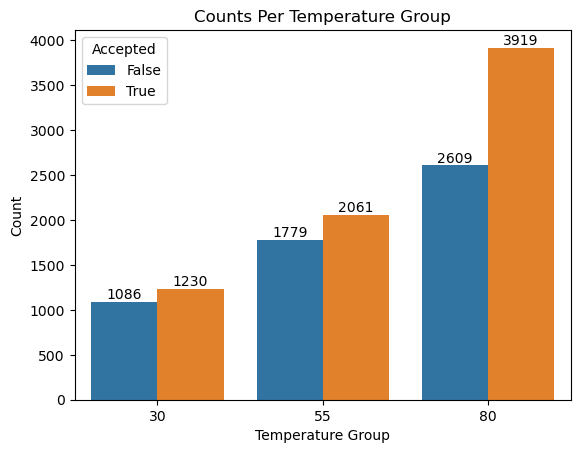

In [1233]:
fig = sns.countplot(data_cleaned, x='temperature', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Temperature Group')
plt.ylabel('Count')
plt.xlabel('Temperature Group')

Text(0.5, 0, 'Expiration Group')

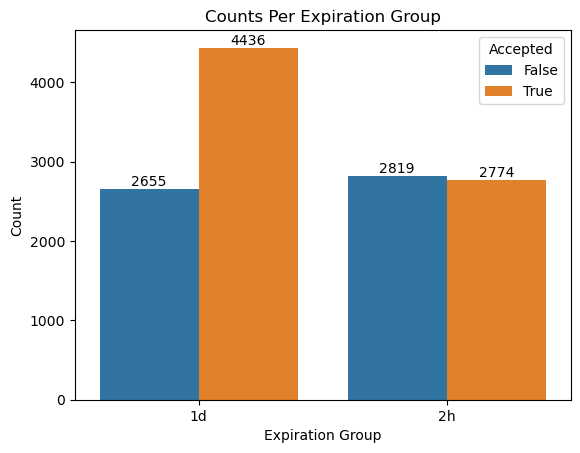

In [1234]:
fig = sns.countplot(data_cleaned, x='expiration', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Expiration Group')
plt.ylabel('Count')
plt.xlabel('Expiration Group')

Text(0, 0.5, 'Education Group')

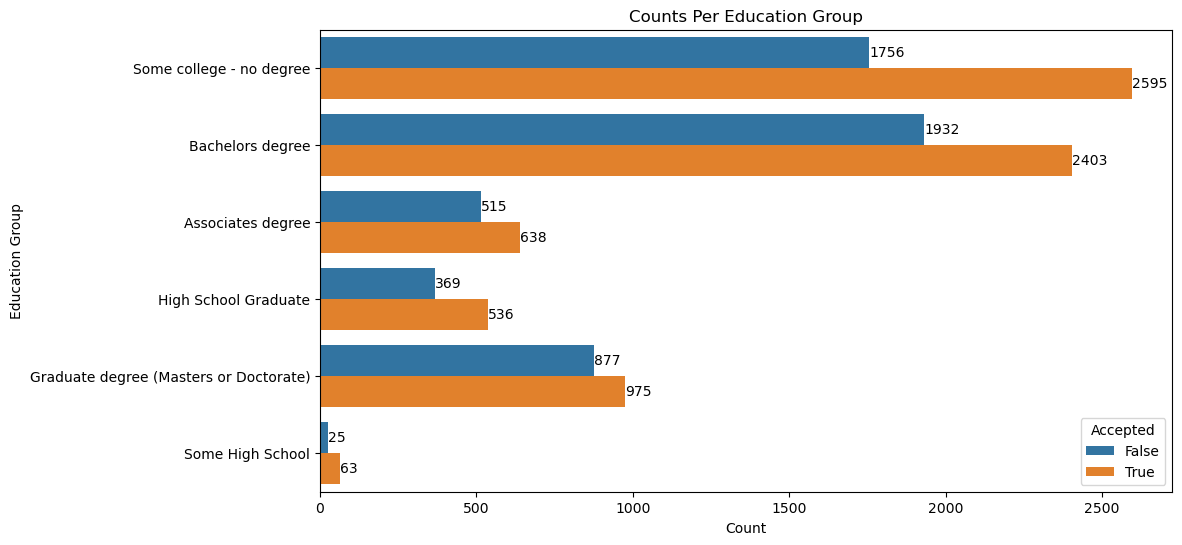

In [1235]:
plt.figure(figsize=(11,6))
fig = sns.countplot(data_cleaned, y='education', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Education Group')
plt.xlabel('Count')
plt.ylabel('Education Group')

Text(0.5, 0, 'Passenger Group')

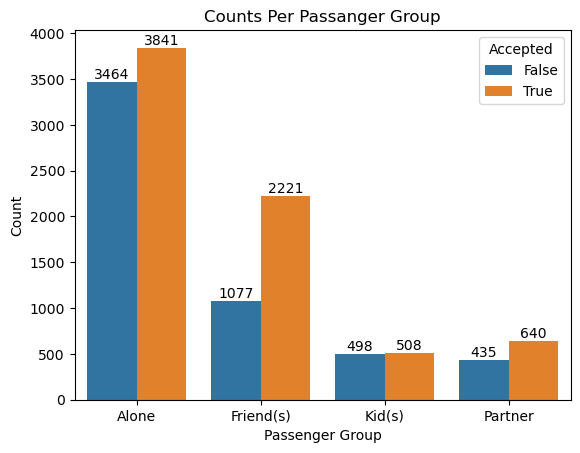

In [1236]:
fig = sns.countplot(data_cleaned, x='passanger', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Passanger Group')
plt.ylabel('Count')
plt.xlabel('Passenger Group')

Text(0.5, 0, 'Has Children?')

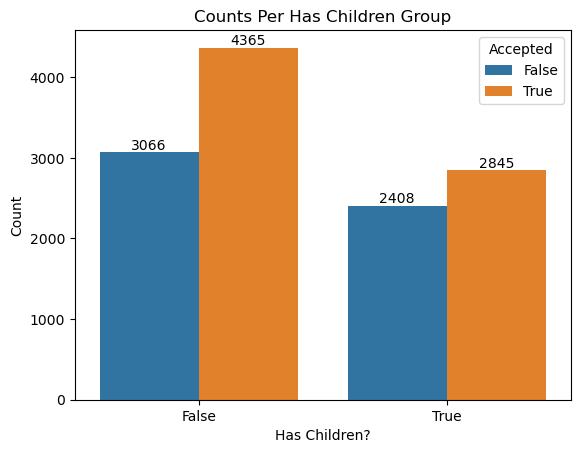

In [1237]:
fig = sns.countplot(data_cleaned, x='has_children', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Counts Per Has Children Group')
plt.ylabel('Count')
plt.xlabel('Has Children?')

# Investigating the Bar Coupons


In [1238]:
df_bar = data_cleaned.query('coupon == "Bar"')
print(df_bar.shape)
df_bar.sample(5)

(2017, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
9828,Work,Alone,Sunny,30,7AM,Bar,1d,Female,21,Single,...,1~3,4~8,1~3,less1,1,1,0,1,0,True
11458,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,41,Married partner,...,gt8,gt8,gt8,4~8,1,1,0,0,1,True
10555,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,26,Single,...,1~3,1~3,4~8,4~8,1,0,0,0,1,True
5492,Home,Alone,Sunny,80,10PM,Bar,1d,Female,41,Single,...,less1,less1,less1,never,1,1,0,1,0,False
12193,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,True


In [1239]:
df_bar['Accepted'].value_counts(normalize=True)

False    0.589985
True     0.410015
Name: Accepted, dtype: float64

**Question**: What proportion of bar coupons were accepted?

**Answer**: 41% of bar coupons were accepted

## Reviewing Bar Visits

Accepted     False  True   Sum  Acceptance Rate
bar_visits                                     
3 or fewer    1131   666  1797         0.370618
more than 3     59   161   220         0.731818


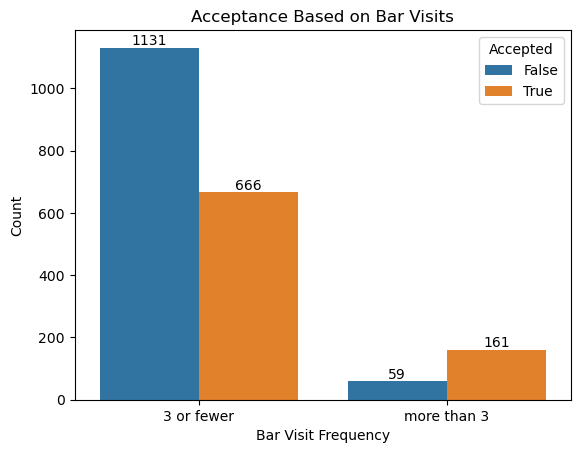

In [1240]:
# Remove warning
pd.options.mode.chained_assignment = None

# fn to group Bar Visits
# df_bar['Bar'].value_counts()
def bar_visits(bar):
    if bar in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'
    
df_bar['bar_visits'] = df_bar['Bar'].apply(bar_visits)

# Create bar plot with Seaborn
fig = sns.countplot(df_bar, x='bar_visits', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Bar Visits')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count')
plt.savefig('images/bar_visits.png')

# Create contingency table comparing bar_visits to acceptance
ct = pd.crosstab(df_bar['bar_visits'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('================================================')
print(ct)
print('================================================')

In [1241]:
count = [666, 161]
nobs = [1797, 220]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 8.530561518715193e-25


**Take-away**:

Among those that visit the bar more than 3 times a month, the acceptance rate was 73.18%, which is 32.19% higher than the overall acceptance rate of 41.00%, indicating that this would be a good group to target in future coupon campaigns. Furthermore, a z-test on the data yielded a p-value of 8.5305e-25, which, being less than 0.05, indicates that this difference is statistically significant.

## Reviewing Bar Visits and Age


Accepted              False  True   Sum  Acceptance Rate
bar_visits & age                                        
Age > 25 & Visit > 1    128   292   420         0.695238
All Others             1062   535  1597         0.335003


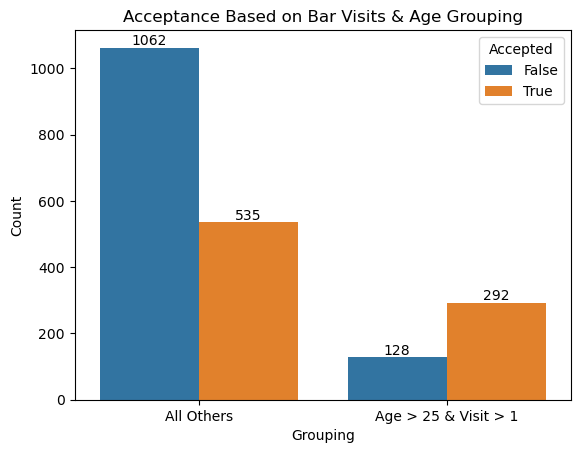

In [1296]:
# df_bar['age'].value_counts()

def targetGroup(Bar, age):
    # go to a bar more than once a month and are over the age of 25     
    if Bar in ['1~3','4~8', 'gt8'] and age not in ['below21', '21']:
        return 'Age > 25 & Visit > 1'
    else:
        return 'All Others'

df_bar['bar_visits & age'] = df_bar[['Bar', 'age']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='bar_visits & age', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Bar Visits & Age Grouping')
plt.xlabel('Grouping')
plt.ylabel('Count')
plt.savefig('images/bar_visits_age.png')

# Create table comparing bar_visits to acceptance
ct = pd.crosstab(df_bar['bar_visits & age'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('================================================================')
print(ct)
print('================================================================')


In [1243]:
count = [535, 292]
nobs = [1597, 420]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 1.0868335024199753e-40


**Take-away**:

Among those that visit the bar more than once a month AND are over the age of 25, the acceptance rate was 69.52%, which is 28.52% higher than the overall acceptance rate of 41.00%, indicating that this would be a more granular group to target in future coupon campaigns. Furthermore, a z-test on the data yielded a p-value of 1.08683e-40, which, being less than 0.05, indicates that this difference is statistically significant.

## Reviewing Bar Visits, Passangers, Occupation


Accepted                       False  True   Sum  Acceptance Rate
bar_visits & pax & occupation                                    
All Others                      1021   427  1448         0.294890
Target Group                     169   400   569         0.702988


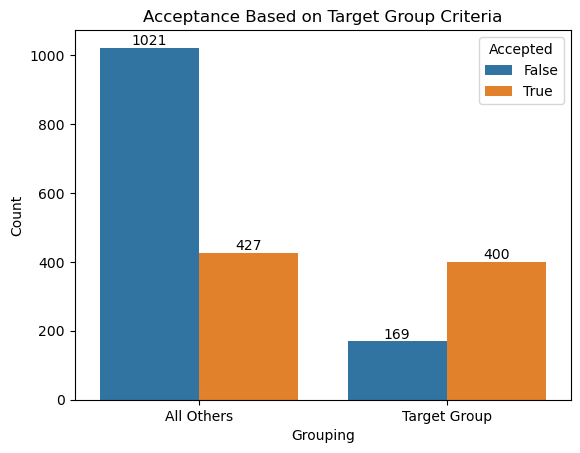

In [1244]:
# df_bar['occupation'].value_counts()

def targetGroup(bar_visits, pax, occupation):
    
    if (# drivers who go to bars more than once a month
        bar_visits not in ['never', 'less1'] and 
        
        # had passengers that were not a kid
        pax not in ['Kid(s)'] and 
        
        # had occupations other than farming, fishing, or forestry
        occupation not in ['Farming Fishing & Forestry']):
        
        return 'Target Group'
    
    else: 
        return 'All Others'
    

df_bar['bar_visits & pax & occupation'] = df_bar[['Bar', 'passanger', 'occupation']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='bar_visits & pax & occupation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Target Group Criteria')
plt.xlabel('Grouping')
plt.ylabel('Count')
plt.savefig('images/bar_visits_pax_occupation.png')

ct = pd.crosstab(df_bar['bar_visits & pax & occupation'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')

Target Group:
 - drivers who go to bars more than once a month AND
 - had passengers that were not a kid AND
 - had occupations other than farming, fishing, or forestry

In [1245]:
count = [427, 400]
nobs = [1448, 569]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 4.048403767614319e-63


**Take-away**:

Among those that go to bars more than once a month AND had passengers that were not a kid AND had occupations other than farming, fishing, or forestry, the acceptance rate was 70.29%, which is 29.29% higher than the overall acceptance rate of 41.00%, indicating that this would be a even more granular group to target in future coupon campaigns. Furthermore, a z-test on the data yielded a p-value of 4.048403e-63, which, being less than 0.05, indicates that this difference is statistically significant.

## Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Accepted      False  True   Sum  Acceptance Rate
targetGroup                                     
All Others     1002   671  1673         0.401076
Target Group    188   156   344         0.453488


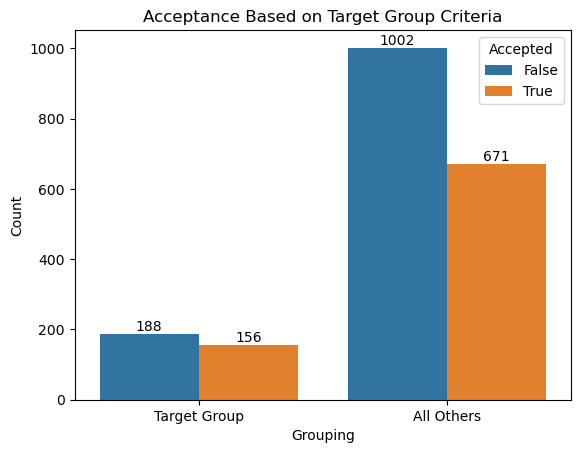

In [1246]:
def targetGroup(Bar, passanger, maritalStatus, age, RestaurantLessThan20, income):
    if (
        # go to bars more than once a month
        bar_visits in ['1~3','4~8', 'gt8'] and 
        
        # had passengers that were not a kid
        passanger not in ['Kid(s)'] and 
        
        # were not widowed
        maritalStatus not in ['widowed']
    ) or (
        # go to bars more than once a month
        bar_visits in ['1~3','4~8', 'gt8'] and 
        
        # are under the age of 30
        age in ['below21', '21', '26']
    ) or (
        #go to cheap restaurants more than 4 times a month
        RestaurantLessThan20 in ['4~8', 'gt8'] and 
        
        # income is less than 50K
        income in ['Less than $12500', '$37500 - $49999', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
    ):
        return 'Target Group'
    else:
        return 'All Others'

df_bar['targetGroup'] = df_bar[['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income']].apply(lambda x: targetGroup(*x), axis=1)

fig = sns.countplot(df_bar, x='targetGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Target Group Criteria')
plt.xlabel('Grouping')
plt.ylabel('Count')
plt.savefig('images/bar_complex.png')

ct = pd.crosstab(df_bar['targetGroup'], df_bar['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('=====================================================================')
print(ct)
print('=====================================================================')

Target Group:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [1247]:
count = [671, 156]
nobs = [1673, 344]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.07185020103763802


Take-away:

For individuals who:

- Visit bars more than once a month, travel with passengers other than children, and are not widowed,
- Visit bars more than once a month and are under the age of 30, or
- Frequent inexpensive restaurants more than 4 times a month with an income of less than $50K,

The coupon acceptance rate was 45.34%. This rate is a modest increase of only 4.34% compared to the overall acceptance rate of 41.00%. A z-test on this data gave a p-value of 0.0718. Since this value is greater than 0.05, the observed difference is not statistically significant. Hence, targeting this particular group is not recommended.




# Conclusion reviewing Bar Coupons
Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The below are target groups that proved to accept the bar coupon more at a higher rate than all others. 

- passengers that visit bars more than 3 times a month - **73.18% Acceptance Rate**
- passengers that are 25+ and visit bars at least once a month - **69.52% Acceptance Rate**
- passengers that visit bars at least once a month, do not have kids and are not in an AGG type of job - **70.29% Acceptance Rate**

Targeting these groups in future campaigns should yield a higher overall acceptance rate for the Bar coupon.

---

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Overview of All Coupon Acceptance Rates

Accepted                  False      True       Sum  Acceptance Rate
coupon                                                              
Bar                    0.093819  0.065200  0.159019         0.410015
Restaurant(20-50)      0.065752  0.051876  0.117629         0.441019
Coffee House           0.157758  0.157285  0.315043         0.499249
Restaurant(<20)        0.064333  0.155314  0.219647         0.707107
Carry out & Take away  0.049905  0.138757  0.188663         0.735478


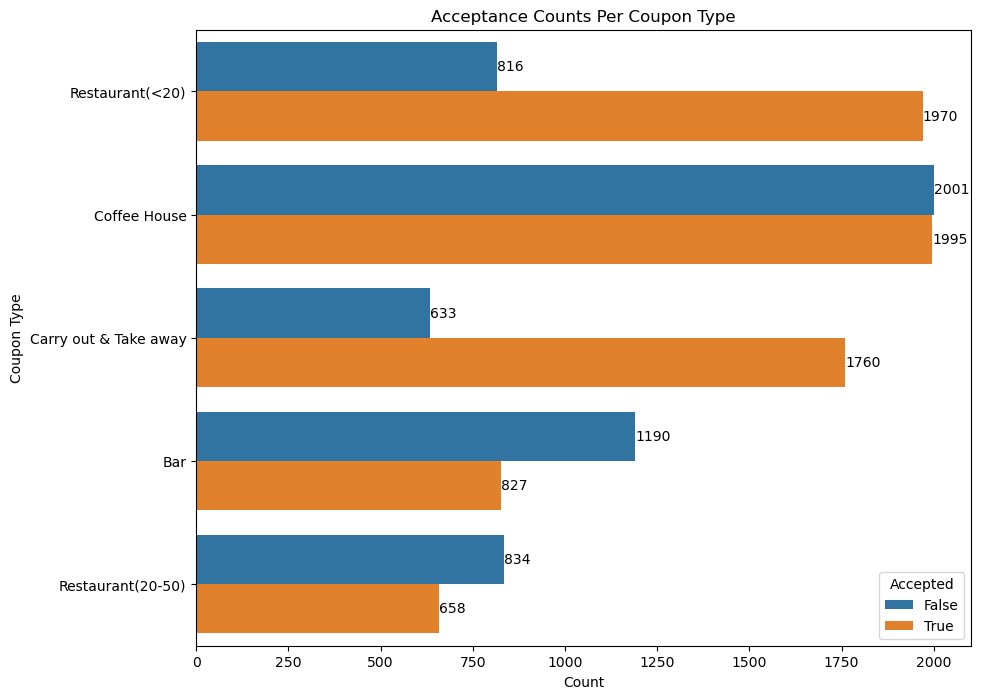

In [1248]:
ct = pd.crosstab(data_cleaned['coupon'], data_cleaned['Accepted'], normalize=True)
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']
print('====================================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('====================================================================')

plt.figure(figsize=(10,8))
fig = sns.countplot(data_cleaned, y='coupon', hue='Accepted')
fig.bar_label(container=fig.containers[0])
fig.bar_label(container=fig.containers[1])

plt.title('Acceptance Counts Per Coupon Type')
plt.ylabel('Coupon Type')
plt.xlabel('Count')
plt.savefig('images/coupon_acceptance.png')

From the data above, the coupon with the largest acceptance rate was the "Carry out & Take away" coupon with ~73% acceptance rate. The Bar coupon was the lowest with 41% acceptance rate. Lets look into the other Restaurant(20-50), the second lowest performing coupon, with a ~44% acceptance rate to see if we can identify the target audience.

## Identify target groups for the Restaurant (20-50) coupon in order to help the business target the correct audience. 


In [1249]:
df_res_20_50 = data_cleaned.query('coupon == "Restaurant(20-50)"')
df_res_20_50.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
12453,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,50plus,Married partner,...,less1,1~3,1~3,1~3,1,0,0,1,0,True
7946,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Single,...,less1,1~3,gt8,gt8,1,1,1,0,1,True
12327,No Urgent Place,Kid(s),Sunny,30,10PM,Restaurant(20-50),2h,Male,31,Married partner,...,never,1~3,1~3,1~3,1,0,0,0,1,False
4759,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,50plus,Single,...,never,less1,4~8,less1,1,1,0,0,1,False
4748,Home,Alone,Sunny,55,6PM,Restaurant(20-50),2h,Female,50plus,Single,...,never,less1,4~8,less1,1,1,0,0,1,False


### Explore the Data as it relates to Restuarant (20-50) Coupon Acceptance

With most of the data being catagorical, I will be using a pandas crosstab table to compare these catagorical varaiables to acceptance of the coupon. I will also utilize the scipy library to perform a chi-square test on the data to provide additional information on the variables as they relate to acceptance of the coupon.

In [1250]:
for column in df_res_20_50.columns:
    ct = pd.crosstab(df_res_20_50['Accepted'], df_res_20_50[column])
    chi2, p, _, _ = chi2_contingency(ct)
    
    print(f"Chi-squared Value for {column} = {chi2}")
    print(f"P-Value for {column} = {p}")
    print(ct)
    print('\n')

Chi-squared Value for destination = 9.708280898709413
P-Value for destination = 0.007796031558132449
destination  Home  No Urgent Place  Work
Accepted                                
False         372              204   258
True          281              206   171


Chi-squared Value for passanger = 25.718418641172853
P-Value for passanger = 1.0923830699307891e-05
passanger  Alone  Friend(s)  Kid(s)  Partner
Accepted                                    
False        583         90     109       52
True         426         78      65       89


Chi-squared Value for weather = 18.104110563875132
P-Value for weather = 0.00011715001301219146
weather   Rainy  Snowy  Sunny
Accepted                     
False        40    126    668
True         25     54    579


Chi-squared Value for temperature = 18.156912784600394
P-Value for temperature = 0.00011409759351900688
temperature   30   55   80
Accepted                  
False        181  212  441
True          92  156  410


Chi-squared Value f

### Review Restaurant Visits

Accepted          False  True  Sum  Acceptance Rate
Restaurant20To50                                   
never               162    68  230         0.295652
n/a                  15     7   22         0.318182
less1               432   302  734         0.411444
1~3                 181   202  383         0.527415
4~8                  34    57   91         0.626374
gt8                  10    22   32         0.687500


Text(0, 0.5, 'Count')

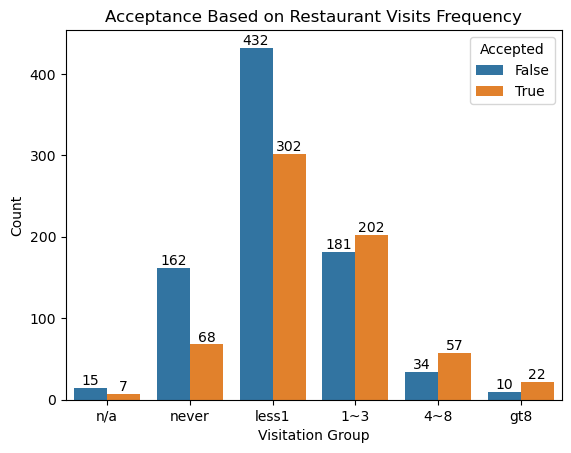

In [1251]:
df_res_20_50['Restaurant20To50'].value_counts()

ct = pd.crosstab(df_res_20_50['Restaurant20To50'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='Restaurant20To50', hue='Accepted', order=['n/a', 'never', 'less1', '1~3', '4~8', 'gt8'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Restaurant Visits Frequency')
plt.xlabel('Visitation Group')
plt.ylabel('Count')

Accepted     False  True   Sum  Acceptance Rate
groupVisits                                    
All Others     790   579  1369         0.422936
4~8+            44    79   123         0.642276


Text(0, 0.5, 'Count')

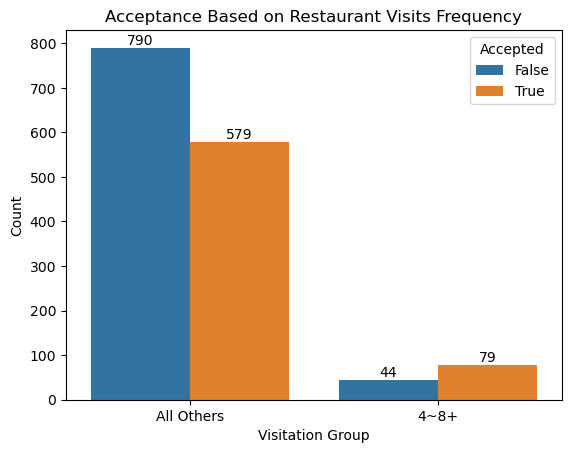

In [1252]:
def group(visits):
    
    if (visits in ['4~8', 'gt8']):
        
        return '4~8+'
    
    return 'All Others'

df_res_20_50['groupVisits'] = df_res_20_50['Restaurant20To50'].apply(group)

ct = pd.crosstab(df_res_20_50['groupVisits'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupVisits', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Restaurant Visits Frequency')
plt.xlabel('Visitation Group')
plt.ylabel('Count')

In [1253]:
count = [579, 79]
nobs = [1369, 123]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 2.6908596567580167e-06


**Take-away**: 

Among those that visit the restaurant between 4 and 8 times a month, the acceptance rate was 62.44%, which is higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Review Destintaion 

Accepted         False  True  Sum  Acceptance Rate
destination                                       
Work               258   171  429         0.398601
Home               372   281  653         0.430322
No Urgent Place    204   206  410         0.502439


Text(0, 0.5, 'Count')

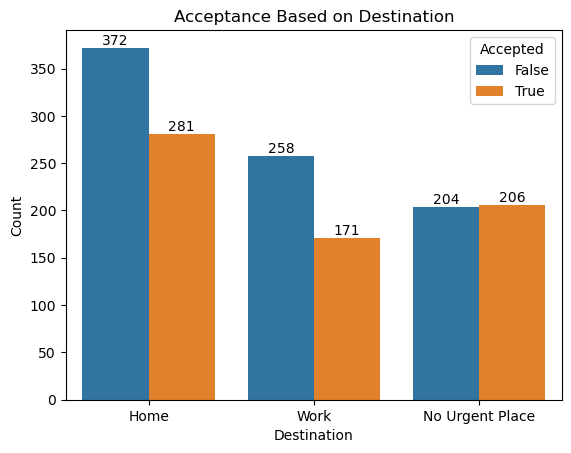

In [1254]:
df_res_20_50['destination'].value_counts()

ct = pd.crosstab(df_res_20_50['destination'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='destination', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Destination')
plt.xlabel('Destination')
plt.ylabel('Count')

Accepted          False  True   Sum  Acceptance Rate
groupDestination                                    
All Others          630   452  1082         0.417745
No Urgent Place     204   206   410         0.502439


Text(0, 0.5, 'Count')

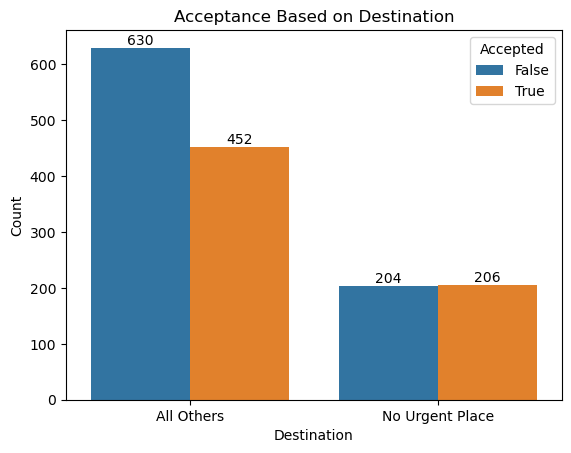

In [1255]:
def group(destination):
    
    if (destination in ['No Urgent Place']):
        
        return 'No Urgent Place'
    
    return 'All Others'

df_res_20_50['groupDestination'] = df_res_20_50['destination'].apply(group)

ct = pd.crosstab(df_res_20_50['groupDestination'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupDestination', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Destination')
plt.xlabel('Destination')
plt.ylabel('Count')

In [1256]:
count = [452, 206]
nobs = [1082, 410]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.0032678157583326314


**Take-away**: 

Among those with no specific destination, the acceptance rate was 50.24%, which is higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Review Passangers

Accepted   False  True   Sum  Acceptance Rate
passanger                                    
Kid(s)       109    65   174         0.373563
Alone        583   426  1009         0.422200
Friend(s)     90    78   168         0.464286
Partner       52    89   141         0.631206


Text(0, 0.5, 'Count')

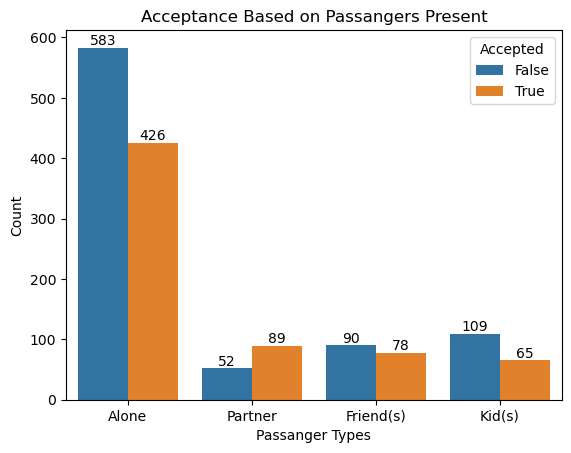

In [1257]:
df_res_20_50['passanger'].value_counts()

ct = pd.crosstab(df_res_20_50['passanger'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='passanger', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Passangers Present')
plt.xlabel('Passanger Types')
plt.ylabel('Count')

Accepted        False  True   Sum  Acceptance Rate
groupPassanger                                    
All Others        782   569  1351         0.421170
Partner            52    89   141         0.631206


Text(0, 0.5, 'Count')

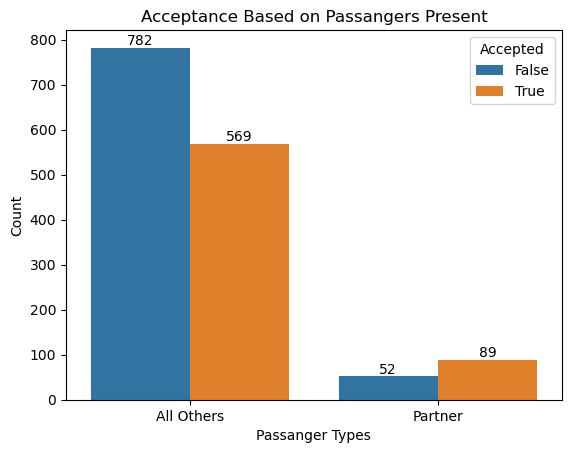

In [1258]:
def group(passanger):
    
    if (passanger in ['Partner']):
        
        return 'Partner'
    
    return 'All Others'

df_res_20_50['groupPassanger'] = df_res_20_50['passanger'].apply(group)

ct = pd.crosstab(df_res_20_50['groupPassanger'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupPassanger', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Passangers Present')
plt.xlabel('Passanger Types')
plt.ylabel('Count')

In [1259]:
count = [569, 89]
nobs = [1351, 141]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 1.753732944084664e-06


**Take-away**: 

Among those that were traveling with a partner, the acceptance rate was 63.12%, which is higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Review Weather

Accepted  False  True   Sum  Acceptance Rate
weather                                     
Snowy       126    54   180         0.300000
Rainy        40    25    65         0.384615
Sunny       668   579  1247         0.464314


Text(0, 0.5, 'Count')

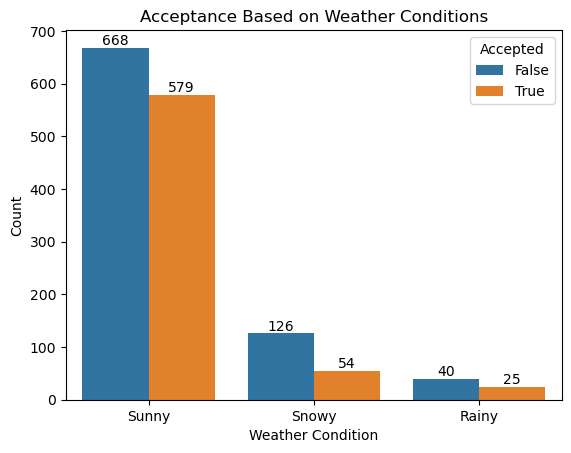

In [1260]:
df_res_20_50['weather'].value_counts()

ct = pd.crosstab(df_res_20_50['weather'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='weather', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')

Accepted      False  True   Sum  Acceptance Rate
groupWeather                                    
All Others      166    79   245         0.322449
Sunny           668   579  1247         0.464314


Text(0, 0.5, 'Count')

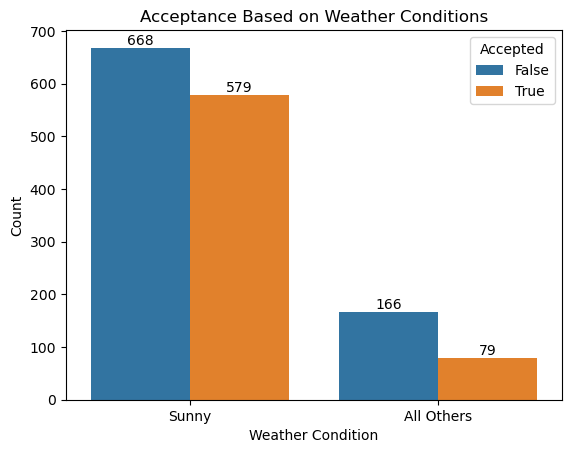

In [1261]:
def group(weather):
    
    if (weather in ['Sunny']):
        
        return 'Sunny'
    
    return 'All Others'

df_res_20_50['groupWeather'] = df_res_20_50['weather'].apply(group)

ct = pd.crosstab(df_res_20_50['groupWeather'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupWeather', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')

In [1262]:
count = [79, 579]
nobs = [245, 1247]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 4.338701099730433e-05


**Take-aways**: 

Among those that were sent coupons on Sunny days, the acceptance rate was 46.43%, which is slightly higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Review Temperature

Accepted     False  True  Sum  Acceptance Rate
temperature                                   
30             181    92  273         0.336996
55             212   156  368         0.423913
80             441   410  851         0.481786


Text(0, 0.5, 'Count')

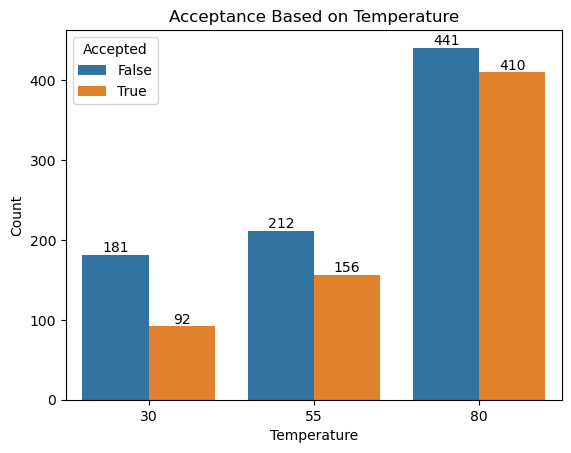

In [1263]:
df_res_20_50['temperature'].value_counts()

ct = pd.crosstab(df_res_20_50['temperature'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='temperature', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')

Accepted          False  True  Sum  Acceptance Rate
groupTemperature                                   
All Others          393   248  641         0.386895
80                  441   410  851         0.481786


Text(0, 0.5, 'Count')

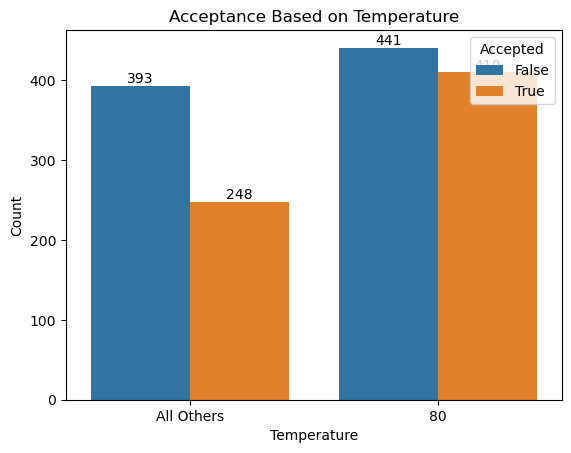

In [1264]:
def group(temperature):
    
    if (temperature in [80]):
        
        return '80'
    
    return 'All Others'

df_res_20_50['groupTemperature'] = df_res_20_50['temperature'].apply(group)

ct = pd.crosstab(df_res_20_50['groupTemperature'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupTemperature', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')

In [1265]:
count = [248, 410]
nobs = [641, 851]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.00025787195082528934


**Take-away**:

Among those that were sent coupons where the temparature was 80 deg, the acceptance rate was 48.17%, which is slightly higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Time

Accepted  False  True  Sum  Acceptance Rate
time                                       
10PM        256   125  381         0.328084
7AM         258   171  429         0.398601
6PM         193   195  388         0.502577
2PM          84    98  182         0.538462
10AM         43    69  112         0.616071


Text(0, 0.5, 'Count')

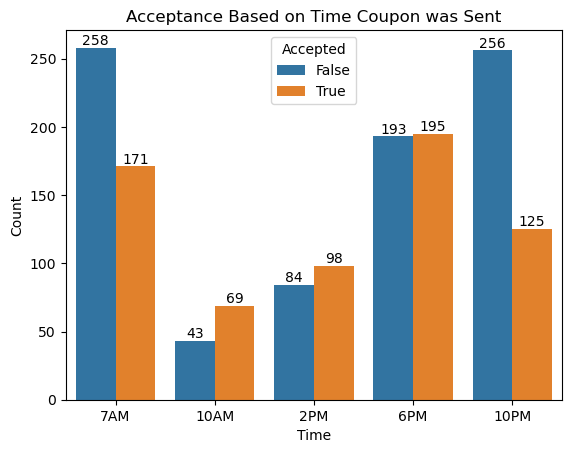

In [1266]:
df_res_20_50['time'].value_counts()

ct = pd.crosstab(df_res_20_50['time'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='time', hue='Accepted', order=['7AM', '10AM', '2PM', '6PM', '10PM'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Time Coupon was Sent')
plt.xlabel('Time')
plt.ylabel('Count')

Accepted    False  True  Sum  Acceptance Rate
groupTime                                    
All Others    514   296  810         0.365432
10AM - 6PM    320   362  682         0.530792


Text(0, 0.5, 'Count')

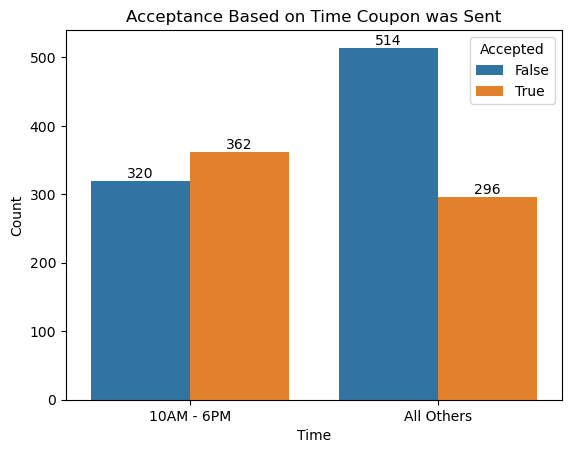

In [1267]:
def group(time):
    
    if (time in ['10AM', '2PM', '6PM']):
        
        return '10AM - 6PM'
    
    return 'All Others'

df_res_20_50['groupTime'] = df_res_20_50['time'].apply(group)

ct = pd.crosstab(df_res_20_50['groupTime'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupTime', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Time Coupon was Sent')
plt.xlabel('Time')
plt.ylabel('Count')

In [1268]:
count = [296, 362]
nobs = [810, 682]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 1.4700952191543992e-10


**Take-away**:

Among those that were sent coupons between the hours of 10AM and 6pm, the acceptance rate was 53.07%, which is higher than the overall acceptance rate of 44%, indicating that sending the coupon out between these times is more favorable. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Expiration

Accepted    False  True  Sum  Acceptance Rate
expiration                                   
2h            376   160  536         0.298507
1d            458   498  956         0.520921


Text(0, 0.5, 'Count')

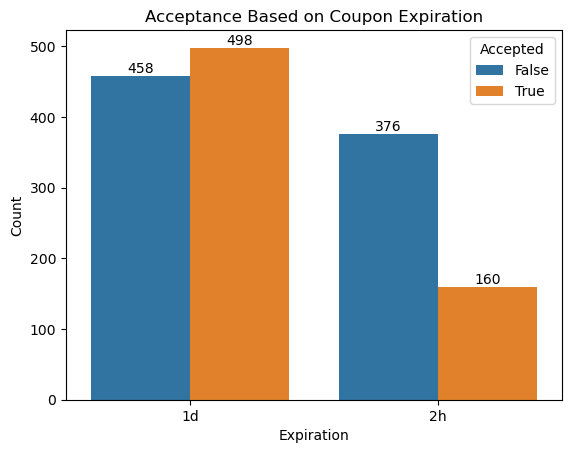

In [1269]:
df_res_20_50['expiration'].value_counts()

ct = pd.crosstab(df_res_20_50['expiration'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))


fig = sns.countplot(df_res_20_50, x='expiration', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Coupon Expiration')
plt.xlabel('Expiration')
plt.ylabel('Count')

In [1270]:
count = [160, 498]
nobs = [536, 956]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 1.027479389725112e-16


**Take-away**:

Among those that were sent a coupon with an expiration of 1 day, the acceptance rate was 52.09%, which is higher than the overall acceptance rate of 44%, indicating the 1d expiration is more favorable. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Has Children

Accepted      False  True  Sum  Acceptance Rate
has_children                                   
True            386   266  652         0.407975
False           448   392  840         0.466667


Text(0, 0.5, 'Count')

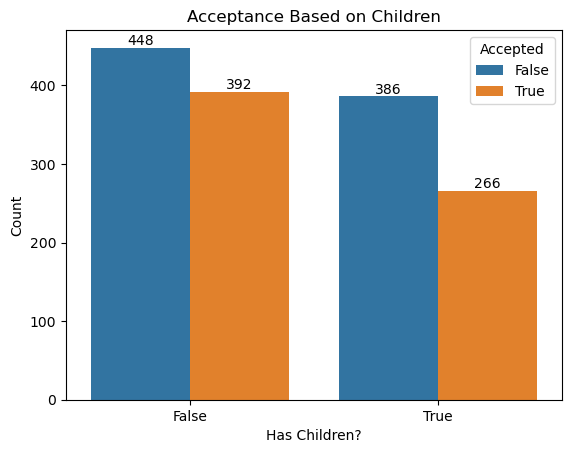

In [1271]:
df_res_20_50['has_children'].value_counts()

ct = pd.crosstab(df_res_20_50['has_children'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='has_children', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Children')
plt.xlabel('Has Children?')
plt.ylabel('Count')

In [1272]:
count = [266, 392]
nobs = [652, 840]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.023526536562009752


**Take-away**:

Among those that were sent a coupon and do not have children, the acceptance rate was 46.46%, which is higher than the overall acceptance rate of 44%, indicating that those without kids may be more open to accepting a coupon. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Occupation

Accepted                                   False  True  Sum  Acceptance Rate
occupation                                                                  
Farming Fishing & Forestry                     5     1    6         0.166667
Installation Maintenance & Repair             16     4   20         0.200000
Retired                                       41    14   55         0.254545
Business & Financial                          50    28   78         0.358974
Unemployed                                   149    84  233         0.360515
Food Preparation & Serving Related            22    13   35         0.371429
Arts Design Entertainment Sports & Media      43    26   69         0.376812
Community & Social Services                   16    10   26         0.384615
Transportation & Material Moving              14     9   23         0.391304
Education&Training&Library                    63    43  106         0.405660
Building & Grounds Cleaning & Maintenance      4     3    7         0.428571

Text(0, 0.5, 'Count')

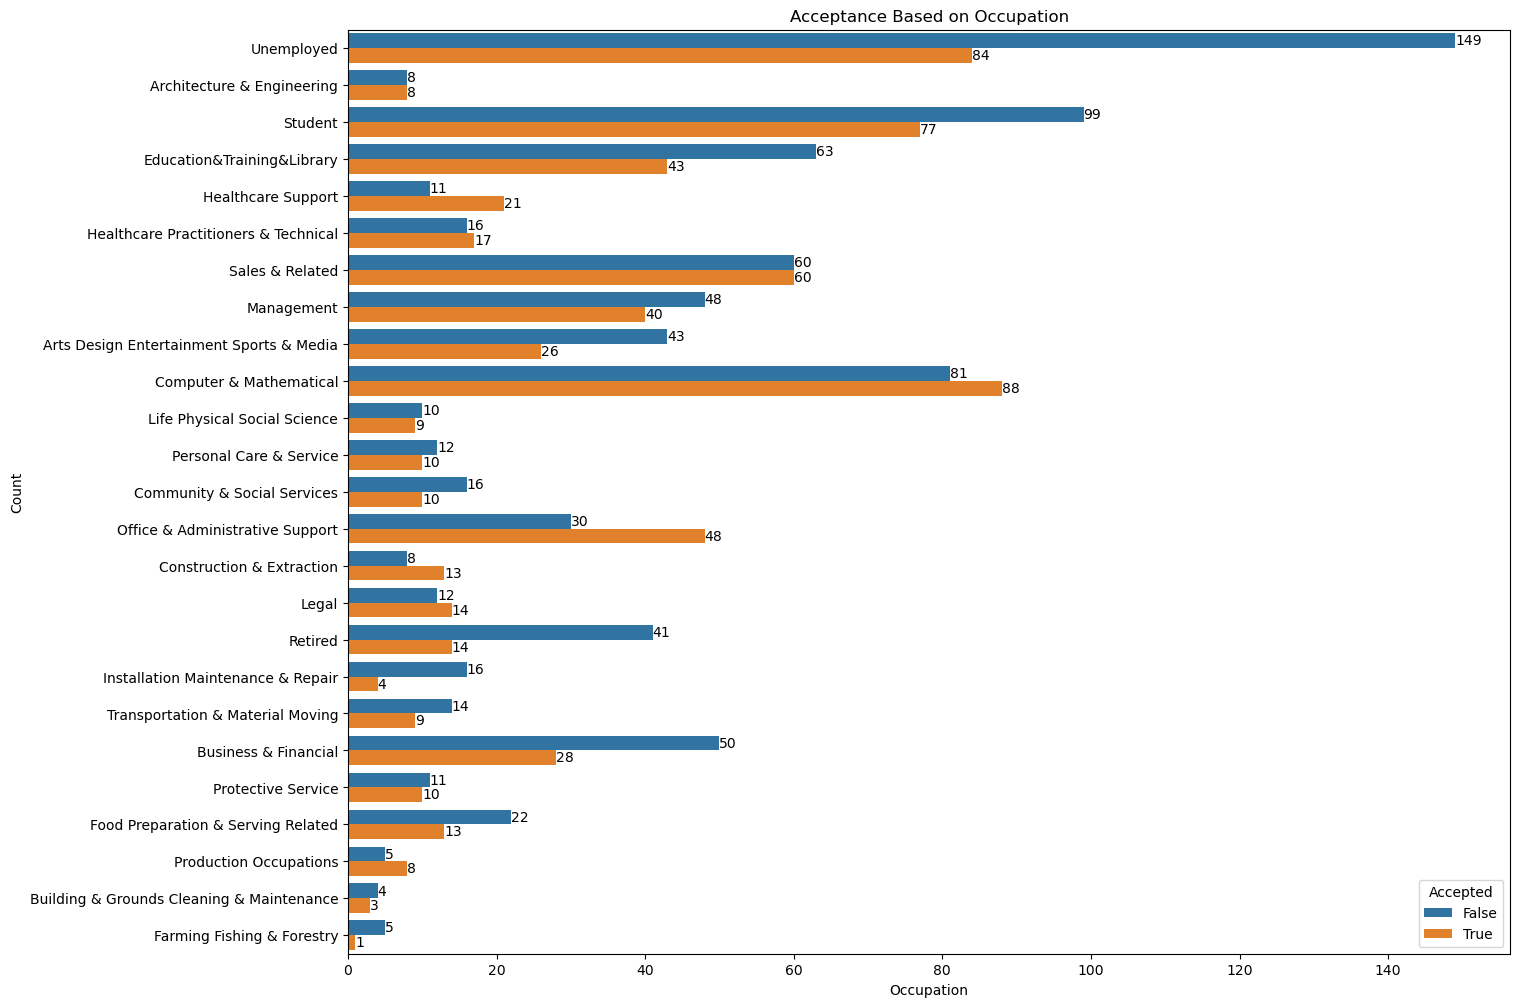

In [1273]:
# df_res_20_50['occupation'].value_counts()

ct = pd.crosstab(df_res_20_50['occupation'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

plt.figure(figsize=(15,12))
fig = sns.countplot(df_res_20_50, y='occupation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

Accepted         False  True   Sum  Acceptance Rate
groupOccupation                                    
All Others         687   466  1153         0.404163
Target Group       147   192   339         0.566372


Text(0, 0.5, 'Count')

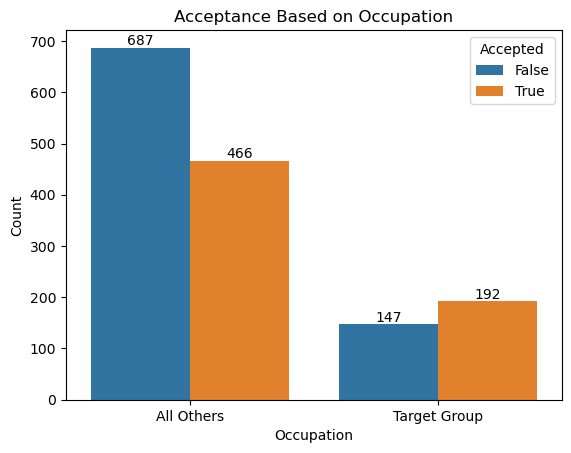

In [1274]:
def group(occupation):
    
    if (occupation in ['Computer & Mathematical', 'Office & Administrative Support', 'Legal', 'Production Occupations', 'Construction & Extraction', 'Healthcare Support']):
        
        return 'Target Group'
    
    return 'All Others'

df_res_20_50['groupOccupation'] = df_res_20_50['occupation'].apply(group)

ct = pd.crosstab(df_res_20_50['groupOccupation'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupOccupation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

In [1275]:
count = [466, 192]
nobs = [1153, 339]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 1.2378078746063238e-07


**Take-away**:

Among those that have a job in Computer & Mathematical, Office & Administrative Support, Legal, Production Occupations, Construction & Extraction, or Healthcare Support, the acceptance rate was 56.63%, which is higher than the overall acceptance rate of 44%, indicating people that have those jobs were more open to accepting the coupon than the others. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Age

Accepted  False  True  Sum  Acceptance Rate
age                                        
50plus      143    79  222         0.355856
below21      37    26   63         0.412698
31          137    98  235         0.417021
21          167   131  298         0.439597
41           73    61  134         0.455224
36           88    78  166         0.469880
46           43    41   84         0.488095
26          146   144  290         0.496552


Text(0, 0.5, 'Count')

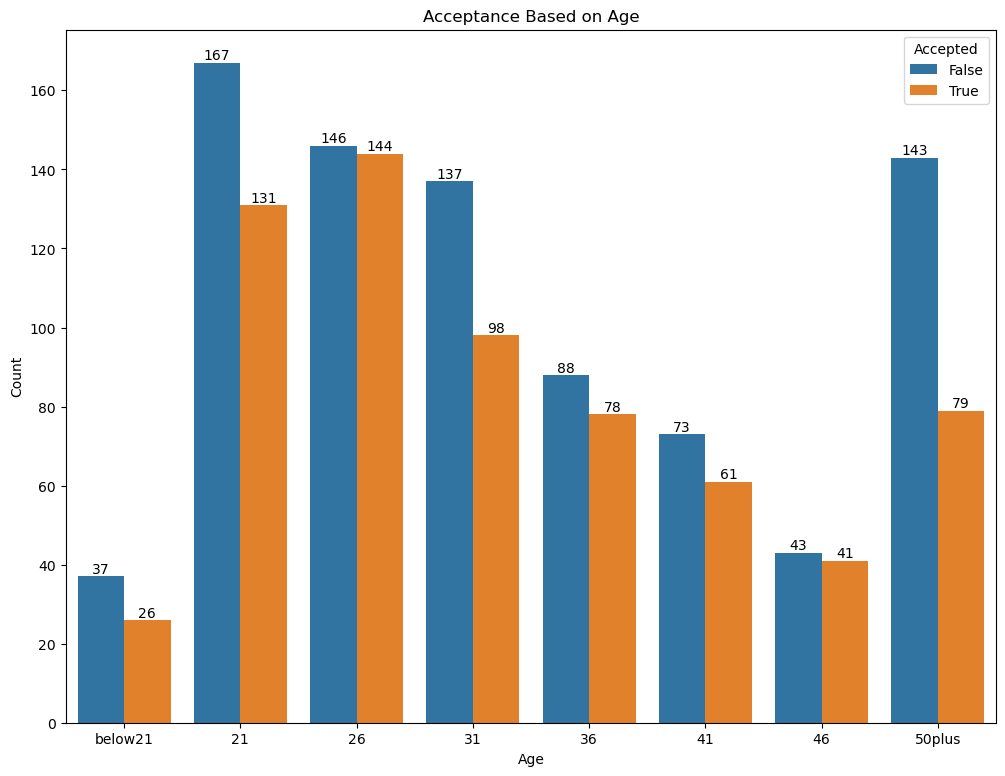

In [1276]:
df_res_20_50['age'].value_counts()

ct = pd.crosstab(df_res_20_50['age'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))
plt.figure(figsize=(12,9))
fig = sns.countplot(df_res_20_50, x='age', hue='Accepted', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Age')
plt.xlabel('Age')
plt.ylabel('Count')

Accepted    False  True  Sum  Acceptance Rate
groupAge                                     
All Others    347   236  583         0.404803
26 - 46       487   422  909         0.464246


Text(0, 0.5, 'Count')

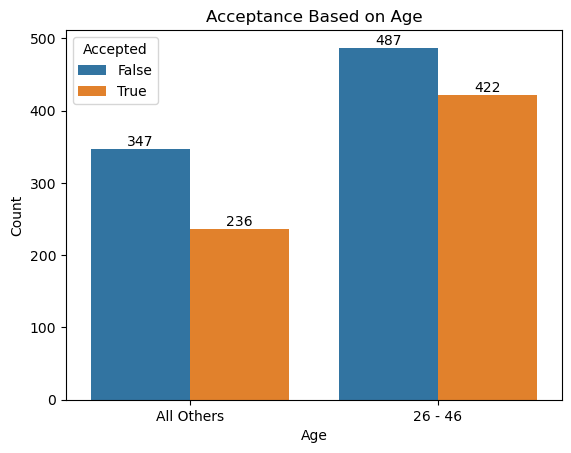

In [1277]:
def group(age):
    
    if (age in ['26', '31', '36', '41', '46']):
        
        return '26 - 46'
    
    return 'All Others'

df_res_20_50['groupAge'] = df_res_20_50['age'].apply(group)

ct = pd.crosstab(df_res_20_50['groupAge'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupAge', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])
plt.title('Acceptance Based on Age')
plt.xlabel('Age')
plt.ylabel('Count')

In [1278]:
count = [236, 422]
nobs = [583, 909]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.024047458819552423


**Take-away**: 

Among those that are between the ages of 26 and 46, the acceptance rate was 46.42%, which is higher than the overall acceptance rate of 44%, indicating that these ages favor the coupon more than all others. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Education

Accepted                                False  True  Sum  Acceptance Rate
education                                                                
Graduate degree (Masters or Doctorate)    126    78  204         0.382353
Bachelors degree                          302   216  518         0.416988
Associates degree                          88    67  155         0.432258
Some college - no degree                  263   236  499         0.472946
High School Graduate                       50    54  104         0.519231
Some High School                            5     7   12         0.583333


Text(0.5, 0, 'Count')

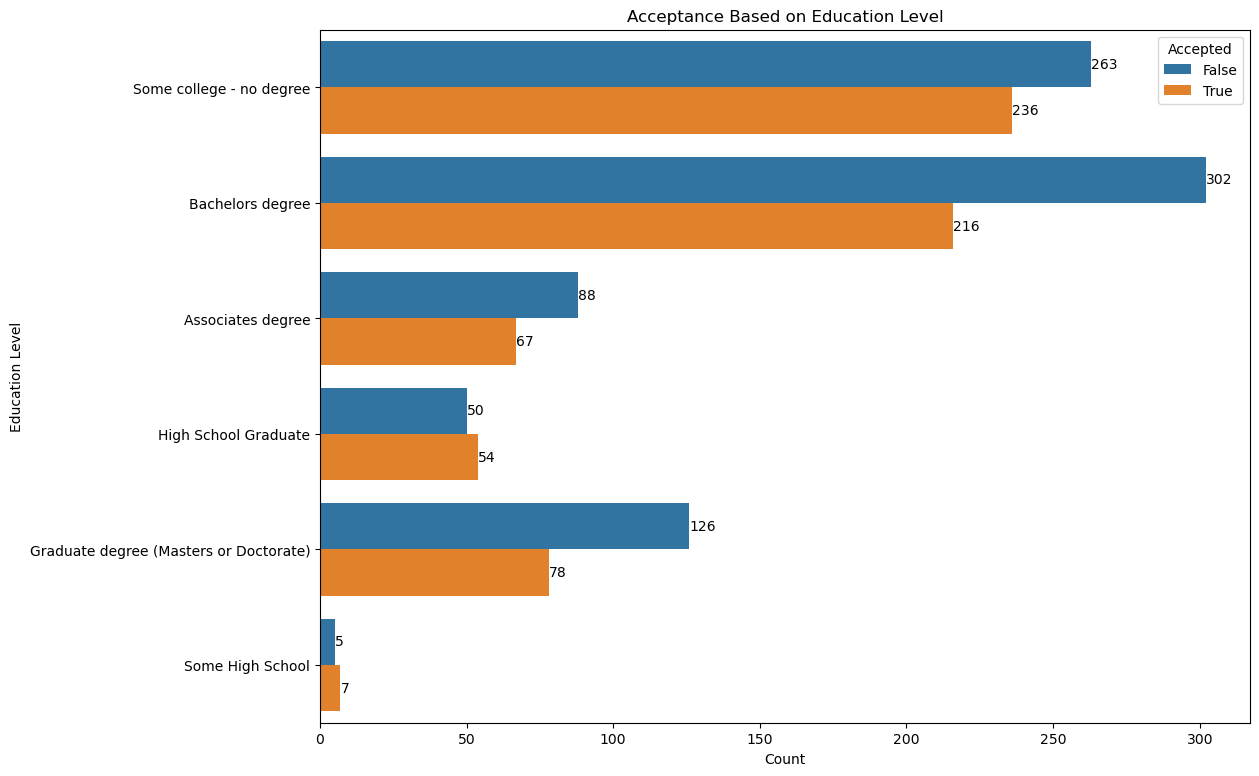

In [1279]:
df_res_20_50['education'].value_counts()

ct = pd.crosstab(df_res_20_50['education'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))
plt.figure(figsize=(12,9))
fig = sns.countplot(df_res_20_50, y='education', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Education Level')
plt.ylabel('Education Level')
plt.xlabel('Count')

Accepted        False  True  Sum  Acceptance Rate
groupEducation                                   
All Others        516   361  877         0.411631
Target Group      318   297  615         0.482927


Text(0.5, 0, 'Count')

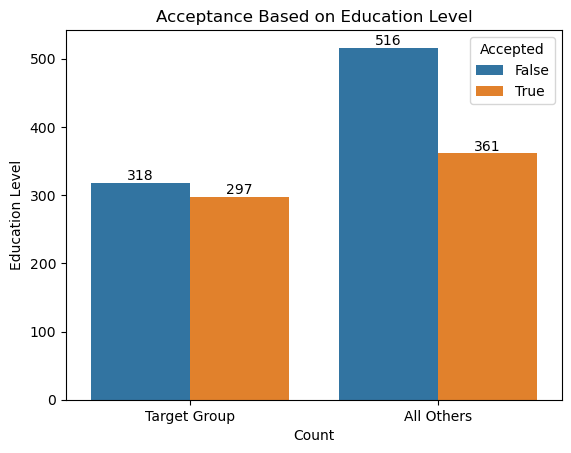

In [1280]:
def group(education):
    
    if (education in ['High School Graduate', 'Some High School', 'Some college - no degree']):
        
        return 'Target Group'
    
    return 'All Others'

df_res_20_50['groupEducation'] = df_res_20_50['education'].apply(group)

ct = pd.crosstab(df_res_20_50['groupEducation'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupEducation', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Education Level')
plt.ylabel('Education Level')
plt.xlabel('Count')

Target Group:

- education level of Some High School Experiance OR High School Graduate OR Some College Experience

In [1281]:
count = [361, 297]
nobs = [877, 615]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.006329815259525802


**Take-away**: 

Among those that have an either a High School degree, Some High School, or Some college but no degree, the acceptance rate was 48.29%, which is higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Marital Status

Accepted           False  True  Sum  Acceptance Rate
maritalStatus                                       
Widowed               13     4   17         0.235294
Divorced              40    22   62         0.354839
Married partner      358   257  615         0.417886
Single               306   263  569         0.462214
Unmarried partner    117   112  229         0.489083


Text(0, 0.5, 'Count')

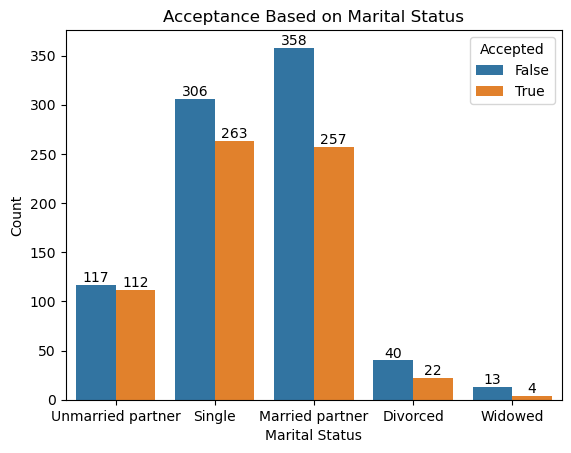

In [1282]:
df_res_20_50['maritalStatus'].value_counts()

ct = pd.crosstab(df_res_20_50['maritalStatus'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='maritalStatus', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

Accepted                    False  True  Sum  Acceptance Rate
groupMaritalStatus                                           
All Others                    411   283  694         0.407781
Single & Unmarried Partner    423   375  798         0.469925


Text(0, 0.5, 'Count')

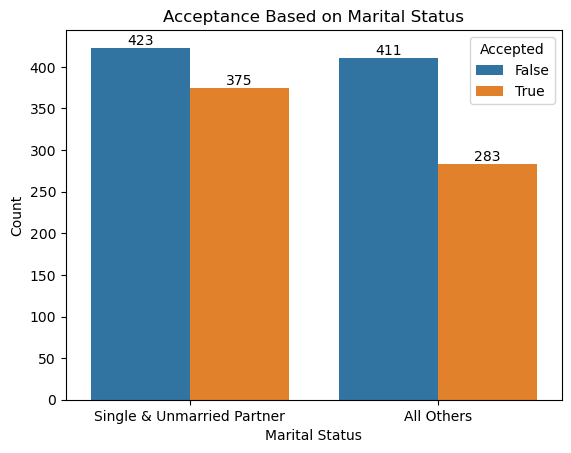

In [1283]:
def group(maritalStatus):
    
    if (maritalStatus in ['Single', 'Unmarried partner']):
        
        return 'Single & Unmarried Partner'
    
    return 'All Others'

df_res_20_50['groupMaritalStatus'] = df_res_20_50['maritalStatus'].apply(group)

ct = pd.crosstab(df_res_20_50['groupMaritalStatus'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupMaritalStatus', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

In [1284]:
count = [283, 375]
nobs = [694, 798]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.01589179741749637


**Take-away**:

Among those that are either Single or with an unmarried partner, the acceptance rate was 46.99%, which is higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Reviewing Gender

Accepted  False  True  Sum  Acceptance Rate
gender                                     
Female      432   322  754         0.427056
Male        402   336  738         0.455285


Text(0, 0.5, 'Count')

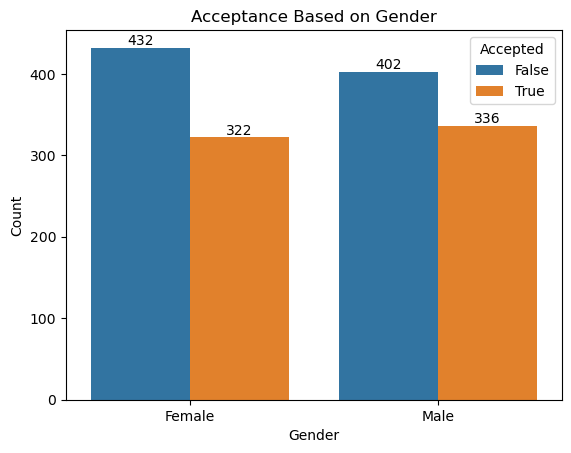

In [1285]:
df_res_20_50['gender'].value_counts()

ct = pd.crosstab(df_res_20_50['gender'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='gender', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

In [1286]:
count = [322, 336]
nobs = [754, 738]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.2722120647638322


**Take-away**:

The acceptance rate of the coupon for Males was 45.53%, which is higher than the overall acceptance rate of 44% and higher than the acceptance rate of Females which was 42.70%. Given that the p-value is not less than 0.05, this difference can not be considered statistically significant.


### Reviewing Income

Accepted          False  True  Sum  Acceptance Rate
income                                             
Less than $12500     80    45  125         0.360000
$62500 - $74999      61    35   96         0.364583
$87500 - $99999      68    41  109         0.376147
$12500 - $24999     127    78  205         0.380488
$37500 - $49999     119    92  211         0.436019
$75000 - $87499      60    49  109         0.449541
$100000 or More     107   102  209         0.488038
$50000 - $62499     101   100  201         0.497512
$25000 - $37499     111   116  227         0.511013


Text(0, 0.5, 'Count')

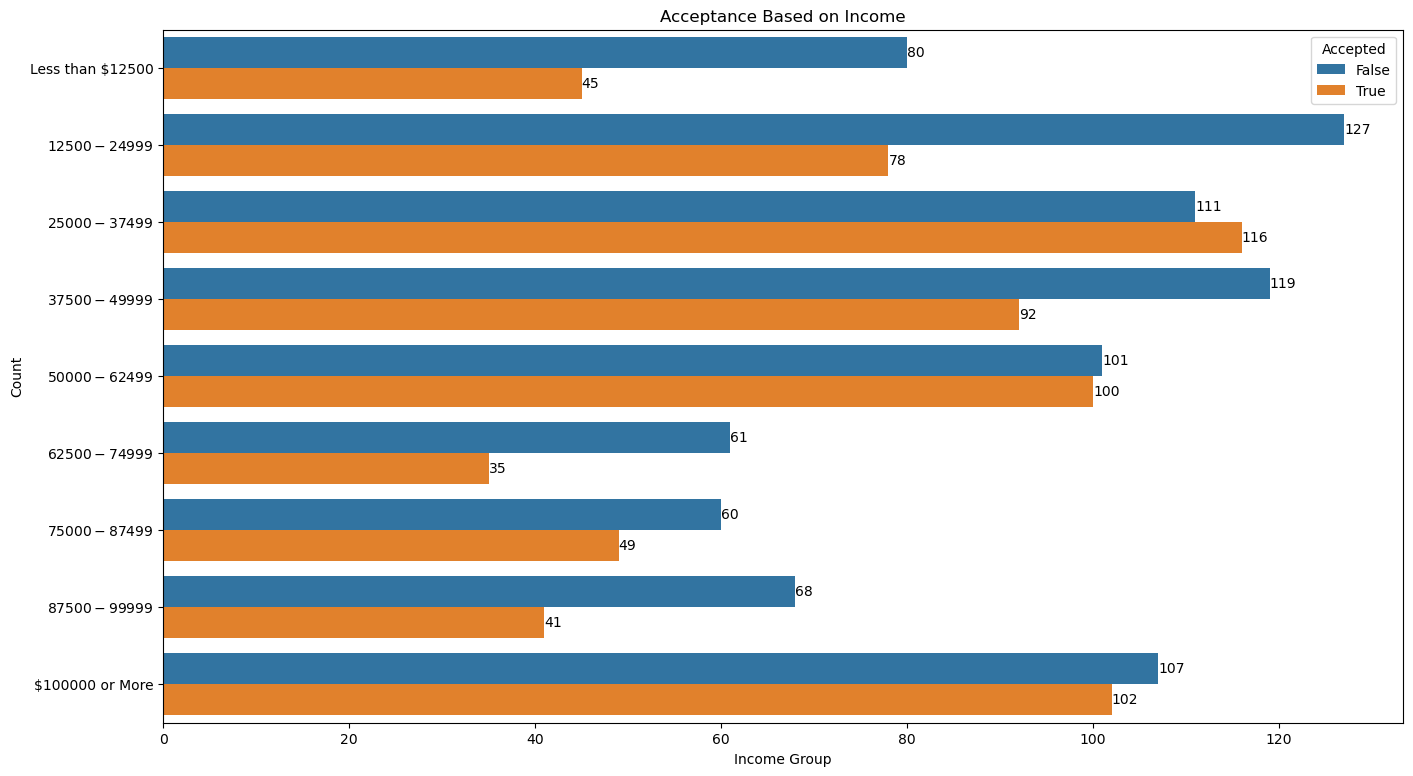

In [1287]:
# df_res_20_50.info()
df_res_20_50['income'].value_counts()

ct = pd.crosstab(df_res_20_50['income'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print('==========================================================')
print(ct.sort_values(by='Acceptance Rate'))
print('==========================================================')

plt.figure(figsize=(16,9))
fig = sns.countplot(df_res_20_50, y='income', hue='Accepted', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Income')
plt.xlabel('Income Group')
plt.ylabel('Count')

Accepted      False  True   Sum  Acceptance Rate
groupIncome                                     
All Others      622   442  1064         0.415414
Target Group    212   216   428         0.504673


Text(0, 0.5, 'Count')

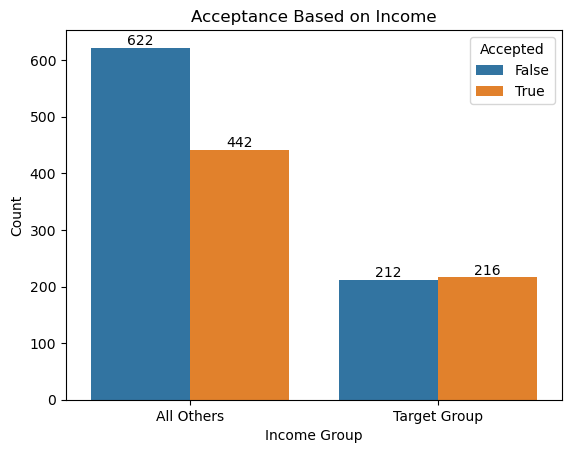

In [1288]:
def group(income):
    
    if (income in ['$50000 - $62499', '$25000 - $37499']):
        
        return 'Target Group'
    
    return 'All Others'

df_res_20_50['groupIncome'] = df_res_20_50['income'].apply(group)

ct = pd.crosstab(df_res_20_50['groupIncome'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='groupIncome', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Income')
plt.xlabel('Income Group')
plt.ylabel('Count')

In [1289]:
count = [442, 216]
nobs = [1064, 428]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 0.0016850934591739408


**Take-away**:

Among those with an income between 25,000 - 37,499 or between 50,000 - 62,499, the acceptance rate was 50.46%, which is higher than the overall acceptance rate of 44%. Furthermore, given that the p-value is less than 0.05, this difference can be considered statistically significant.

### Identifying Target Groups

#### Lets look at a target group considering age, restaurant visit frequency, and if they have children

Accepted      False  True   Sum  Acceptance Rate
TargetGroup                                     
All Others      742   501  1243         0.403057
Target Group     92   157   249         0.630522


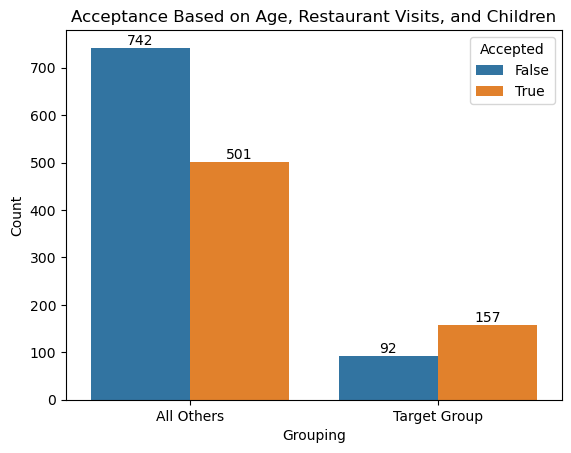

In [1299]:
def targetGroup(Restaurant20To50, has_children, expiration, age, maritalStatus):
    
    if (
        has_children == False and 
        
        age not in ['50plus', 'below21'] and
        
        Restaurant20To50 in ['1~3','4~8', 'gt8'] 
    ):
        
        return 'Target Group'
    
    return 'All Others'

df_res_20_50['TargetGroup'] = df_res_20_50[['Restaurant20To50', 'has_children', 'expiration', 'age', 'maritalStatus']].apply(lambda x: targetGroup(*x), axis=1)

ct = pd.crosstab(df_res_20_50['TargetGroup'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))


fig = sns.countplot(df_res_20_50, x='TargetGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Age, Restaurant Visits, and Children')
plt.xlabel('Grouping')
plt.ylabel('Count')
plt.savefig('images/res_group1.png')

Target Group:
 - Does not have children AND
 - Age is between 21 and 50 AND
 - Visits restaurant between 1 and 8+ times a month

In [1291]:
count = [501, 157]
nobs = [1243, 249]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above target group is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above target group is 4.1563744006080675e-11


**Take-away**:

Among those that do not have children, and are between the ages of 21 and 50, and visit the restaurant between 1 and 8+ times a month, the acceptance rate was 63.05%, which is 19.05% higher than the overall acceptance rate of 44%, indicating that this would be a good group to target in future coupon campaigns. Furthermore, given that the p-value of 4.15637-11 is less than 0.05, this difference can be considered statistically significant.

#### Lets look at a target group considering passangers, time of dat, and destination

Accepted      False  True   Sum  Acceptance Rate
TargetGroup                                     
All Others      786   569  1355         0.419926
Target Group     48    89   137         0.649635


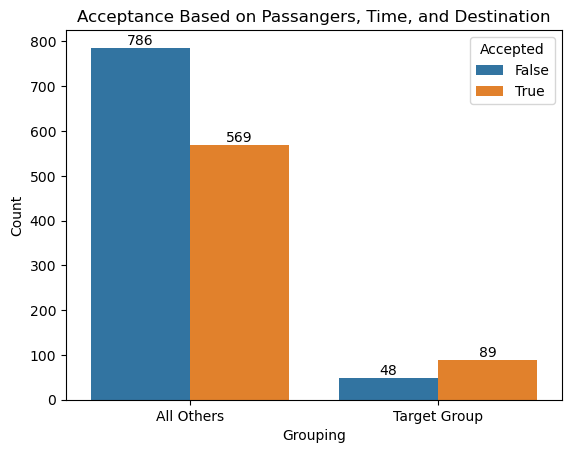

In [1298]:
def targetGroup(time, destination, passanger):
    
    if (
        passanger in ['Partner'] and
        
        time in ['10AM', '2PM', '6PM'] and 
        
        destination in ['No Urgent Place']

    ):
        
        return 'Target Group'
    
    return 'All Others'

df_res_20_50['TargetGroup'] = df_res_20_50[['time', 'destination','passanger']].apply(lambda x: targetGroup(*x), axis=1)

ct = pd.crosstab(df_res_20_50['TargetGroup'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))

fig = sns.countplot(df_res_20_50, x='TargetGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Passangers, Time, and Destination')
plt.xlabel('Grouping')
plt.ylabel('Count')
plt.savefig('images/res_group2.png')


Target Group:
 - Has a partner as a passanger AND
 - Receives the coupon between 10AM dn 6PM AND
 - Has no urgent destination

In [1293]:
count = [569, 89]
nobs = [1355, 137]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 2.4622407764190127e-07


**Take-away**:

Among those that travel with a partner, and are traveling between the hours of 10AM and 6PM, and have no urgent destination, the acceptance rate was 64.96%, which is 20.96% higher than the overall acceptance rate of 44%, indicating that this would be a good group to target in future coupon campaigns. Furthermore, given that the p-value of 2.462240e-07 is less than 0.05, this difference can be considered statistically significant.

#### Lets look at a target group considering weather and coupon expiration

Accepted      False  True  Sum  Acceptance Rate
TargetGroup                                    
All Others      582   356  938         0.379531
Target Group    252   302  554         0.545126


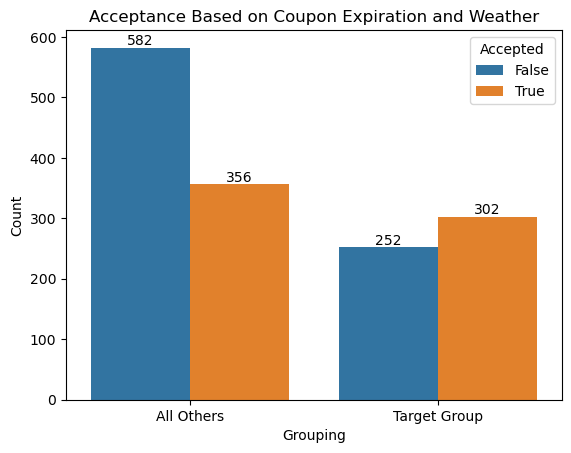

In [1297]:
def targetGroup(weather, expiration, temperature):
    
    if (
        expiration in ['1d'] and 
        
        weather in ['Sunny'] and
        
        temperature in [80]
    ):
        
        return 'Target Group'
    
    return 'All Others'

df_res_20_50['TargetGroup'] = df_res_20_50[['weather', 'expiration', 'temperature']].apply(lambda x: targetGroup(*x), axis=1)

ct = pd.crosstab(df_res_20_50['TargetGroup'], df_res_20_50['Accepted'])
ct['Sum'] = ct[False] + ct[True]
ct['Acceptance Rate'] = ct[True] / ct['Sum']

print(ct.sort_values(by='Acceptance Rate'))


fig = sns.countplot(df_res_20_50, x='TargetGroup', hue='Accepted')
fig.bar_label(container=fig.containers[False])
fig.bar_label(container=fig.containers[True])

plt.title('Acceptance Based on Coupon Expiration and Weather')
plt.xlabel('Grouping')
plt.ylabel('Count')
plt.savefig('images/res_group3.png')

Target Group:
 - Coupon expiration is 1 day AND
 - Weather is Sunny and 80 Deg

In [1295]:
count = [356, 302]
nobs = [938, 554]

stat, pval = proportions_ztest(count, nobs)
print(f'The p-value of the above is {pval}')  # If pval < 0.05, the difference is statistically significant

The p-value of the above is 4.835962558497733e-10


**Take-away**:

Among those that are are sent a coupon on a Sunny day with a temperature of 80 deg and a coupon expiration of 1 day, the acceptance rate was 54.51%, which is 10.51% higher than the overall acceptance rate of 44%, indicating that this would be a good group to target in future coupon campaigns. Furthermore, given that the p-value of 4.83596e-10 is less than 0.05, this difference can be considered statistically significant.


# Conclusion

Analysis of the Restuarant (20 - 50) coupon acceptance rate revealed several specific groups with significantly higher rates than the overall acceptance of 44%. Specifically the following:

Individuals aged between 21 and 50, who do not have children and frequent the restaurant between 1 and 8+ times a month, have an acceptance rate of 63.05%. This is 19.05% higher than the overall rate, making them a prime group to target in future campaigns.

People traveling with a partner between 10AM and 6PM, with no pressing destination, show a 64.96% acceptance rate, a 20.96% increase over the general trend. They also represent a promising target demographic for future coupon promotions.

On sunny days with temperatures of 80°F, offering coupons with a one-day expiration can be effective. The observed acceptance rate for such conditions is 54.51%, which is 10.51% higher than the overall rate.

For all the above scenarios, the observed differences in acceptance rates are statistically significant with p-values less than 0.05. Thus, future coupon campaigns should strongly consider these findings to maximize their effectiveness.